In [86]:
from TO_sim.analytical.sec_order_parameter import make_r_rsec_N as MR
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.integrate import quad


In [282]:
Ks = np.arange(0.1,10+0.05,0.1)
ms = np.arange(0.1,10+0.05,0.1)


In [88]:
# m,Ks,r_d,r_u,r_md,r_mu,rs_d,rs_u,rs_u_l,rs_u_d = MR(6,Ks,samples=100)

In [89]:
m = 4.5

In [283]:
df_read = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])
r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
r_mus = df_read['r_main_u'].unstack()[m].to_numpy()

r_secds = df_read['r_sec_d'].unstack()[m].to_numpy()
r_secus = df_read['r_sec_u'].unstack()[m].to_numpy()

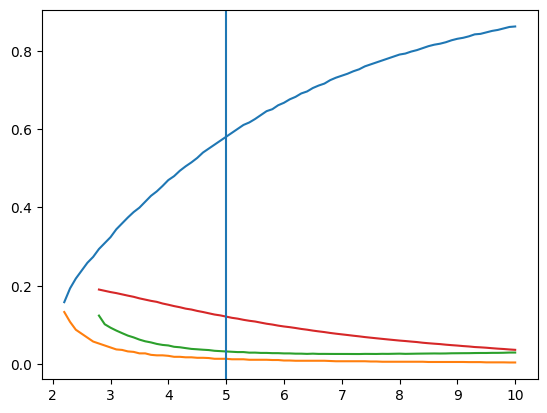

In [284]:
plt.plot(Ks,r_us)
plt.plot(Ks,r_ds)
plt.plot(Ks,r_secds)
plt.plot(Ks,r_secus)
plt.axvline(K)

In [92]:
df_read['r_sec_u'].unstack()[m][K]

NameError: name 'K' is not defined

## Order parameter, r_sec, Omega와의 관계

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
RK4_jit = IJ.RK4

In [ ]:
seed = 9
N = 2000
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 7
K = 5.2
dt = 0.1
t = np.arange(0, 5000+dt/2, dt)
Theta = np.zeros(2*N)
Theta[:N] = theta_random 
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t, args=(omega, N, m, K))
theta,dtheta = sol[:,:N],sol[:,N:2*N]
rs = np.abs(np.mean(np.exp(theta.T*1j),axis=0))
# theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
#                         p_theta=theta_random, p_dtheta=omega, p_omega=omega)
# sum_time = 2000
if dt <0.1:
    t = t[::10]
    theta = theta[::10]
    dtheta = dtheta[::10]
    rs = rs[::10]

In [ ]:
np.mean(rs[-500:]),np.std(rs[-500:])/(np.sqrt(2)*(1-0.2))

(0.5483475329467274, 0.14670011238167538)

Text(0.5, 1.0, '$m=7,K=5.2,N=2000$')

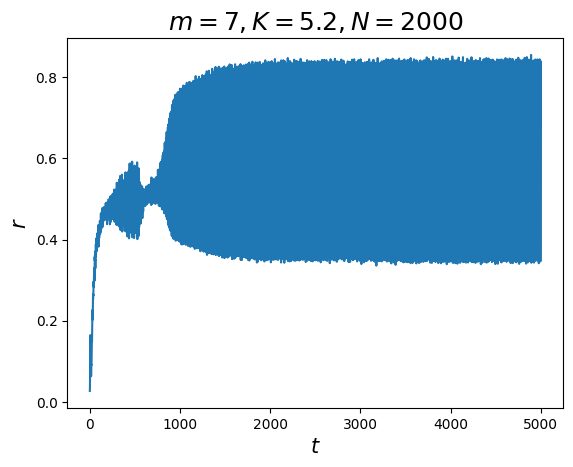

In [ ]:
plt.plot(t,rs)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$r$',fontsize=15)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)


In [ ]:
np.std(rs[-500:])/np.sqrt(2)*2

0.23472017981068063

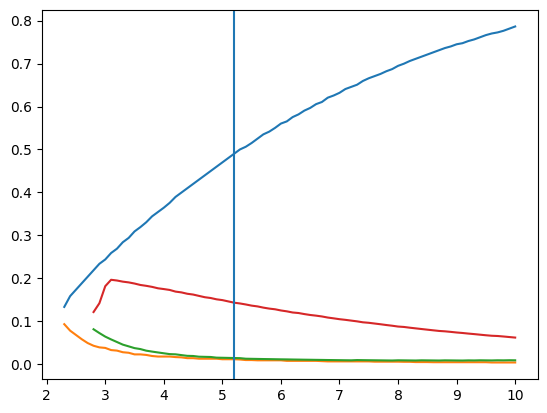

In [ ]:
df_read = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])
r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
r_mus = df_read['r_main_u'].unstack()[m].to_numpy()

r_secds = df_read['r_sec_d'].unstack()[m].to_numpy()
r_secus = df_read['r_sec_u'].unstack()[m].to_numpy()
plt.plot(Ks,r_us)
plt.plot(Ks,r_ds)
plt.plot(Ks,r_secds)
plt.plot(Ks,r_secus)
plt.axvline(K)

In [ ]:
df_read['r_sec_u'].unstack()[m][K],df_read['r_sec_d'].unstack()[m][K]

(0.1431563032449225, 0.01423599834435993)

In [ ]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta[:], axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)

CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=1e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS

array([1203,  267,  257])

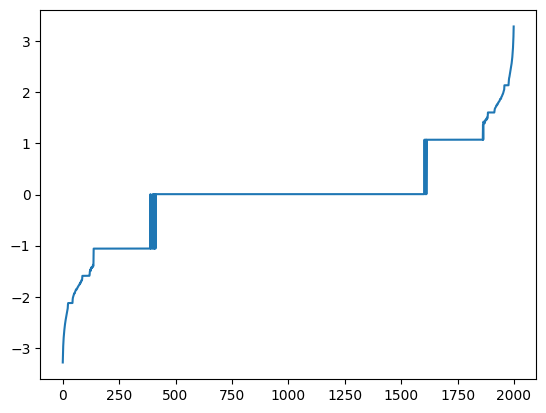

In [ ]:
plt.plot(avg_dtheta[-1])

In [ ]:
CLU = np.concatenate([*cluster])
not_CLU = np.setdiff1d(np.arange(N), CLU)
not_main = np.setdiff1d(np.arange(N), cluster[0])
rs_clu = {}
rs_clu_mean = {}
rs_clu_std = {}
psi_clu = {}
sum_time = 1000
M = CMO[0]

names = {}
colors = {}
c_nums = []
'gold','aqua','fuchsia'

CS_s = {}
cluster_s = {}

for size,sp,clu in zip(CS,CMO,cluster):
    ro = sp-CMO[0]
    if ro==0:cname='0';names[cname]='Main cluster';colors[cname]='gold';CS_s[cname]=size;cluster_s[cname]=clu
    elif ro<0:cname='-';names[cname]=r'secondary cluster$(-)$';colors[cname]='aqua';CS_s[cname]=size;cluster_s[cname]=clu
    else:cname='+';names[cname]=r'secondary cluster$(+)$';colors[cname]='fuchsia';CS_s[cname]=size;cluster_s[cname]=clu
    temp = 1/N*np.sum(np.exp(1j*theta[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu[cname]=rc
    rs_clu_mean[cname]=rc_mean
    rs_clu_std[cname]=rc_std
    psi_clu[cname]=psic


temp_clu = 1/N*np.sum(np.exp(1j*theta[:, CLU]), axis=1)
temp_nclu = 1/N*np.sum(np.exp(1j*theta[:, not_CLU]), axis=1)

r_clu = abs(temp_clu)
r_nclu = abs(temp_nclu)
rs_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])
rs_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                    for i in range(len(t)-sum_time)])


In [ ]:
rs_clu_mean[-1]

KeyError: -1

In [ ]:
def A(r,K=K,m=m):
    return 1/np.sqrt(K*r*m)

def B(r,CS,CM,K=K,m=m):
    return (CS-CM)/(K*r)
def M_theta(r,CS,CM,K=K,m=m):
    a = A(r,K=K,m=m)
    b = B(r,CS,CM,K=K,m=m)
    return - a**2/(2*b**2)
cm = np.mean(np.cos(psi_clu[1]-psi_clu[0])[-5000:])
M = M_theta(rs_clu_mean[0][-1],CMO[1],CMO[0])
print(cm,M)


-0.18663119400563488 -0.19602799733325194


In [ ]:
c_nums

[0, 1, 2]

In [ ]:
t_arg, = np.where(rs_clu[0]*N/CS[0]>0.98)
t_re = t_arg[0]
t[t_re]

406.90000000000003

In [ ]:
for i,_ in enumerate(CMO):
    print(max(rs_clu[i]))

0.6548262133695536
0.1073901203643014
0.10446647224278859


In [ ]:
rs_clu_mean[1][-1]

0.07433781513194171

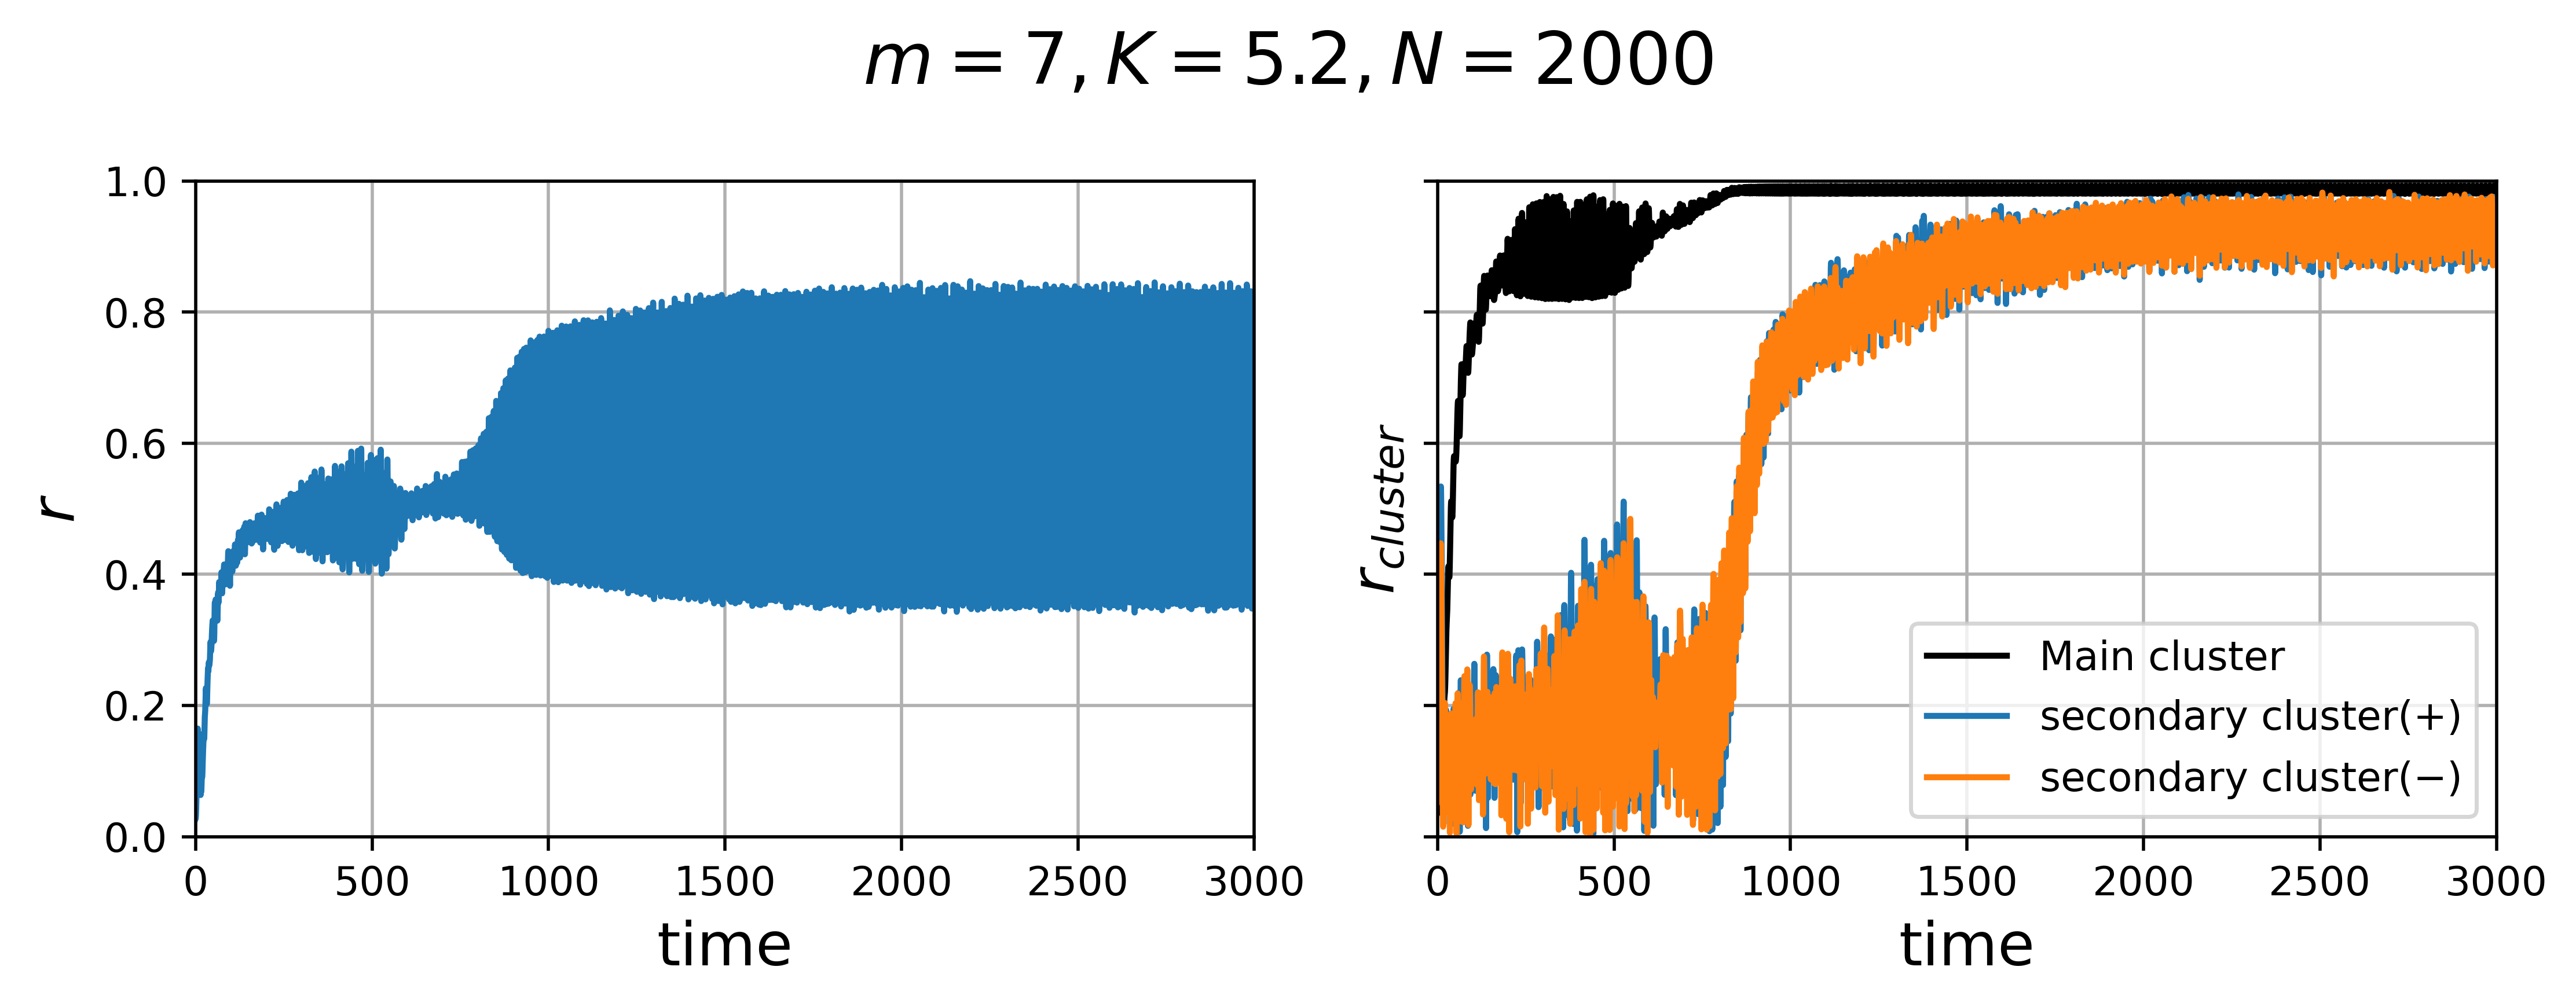

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=[9,3.5], dpi=500,sharex=True,sharey=True)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

# ax1 = plt.gca()
plt.sca(ax1)
plt.plot(t,rs)
plt.grid()
plt.xlabel('time',fontsize=15)
plt.ylabel('$r$',fontsize=15)

plt.xlim(0, 3000)
plt.ylim(0,1)

plt.sca(ax2)

plt.sca(ax2)
cname= '0'
plt.plot(t, rs_clu[cname]*N/CS_s[cname], label=names[cname], color='black')
cname= '+'
plt.plot(t, rs_clu[cname]*N/CS_s[cname], label=names[cname])
cname= '-'
plt.plot(t, rs_clu[cname]*N/CS_s[cname], label=names[cname])



plt.grid()
plt.legend()
# plt.xlim(0, 3000)
plt.sca(ax2)
plt.ylim(0,1)
# plt.axvline(t[t_arg][0])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)
fig.suptitle(rf'$m={m},K={K},N={N}$',fontsize=18)
plt.xlabel('time',fontsize=15)
fig.tight_layout()
plt.show()

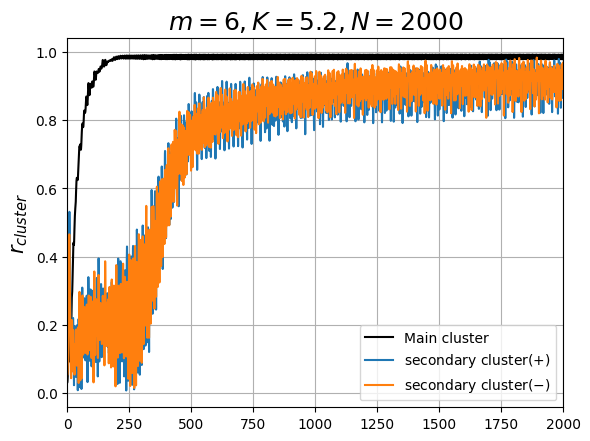

In [ ]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
# plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
cname= '0'
plt.plot(t, rs_clu[cname]*N/CS_s[cname], label=names[cname], color='black')
cname= '+'
plt.plot(t, rs_clu[cname]*N/CS_s[cname], label=names[cname])
cname= '-'
plt.plot(t, rs_clu[cname]*N/CS_s[cname], label=names[cname])


plt.grid()
plt.legend()
plt.xlim(0, 2000)
plt.sca(ax1)
# plt.axvline(t[t_arg][0])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)
plt.show()

## 잘보이게 만든것

In [ ]:
t_arg, = np.where(rs_clu['0']*N/CS_s['0']>0.985)
t_re = t_arg[0]
t[t_re:].shape
t[t_re]

818.6

In [ ]:
sum_time = 500
avg_dtheta_test = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [ ]:
r_0 = rs_clu_mean['0'][-1]

In [ ]:
R0=df_read['r_main_u'].unstack()[m][K]
RM = df_read['r_mean_u'].unstack()[m][K]
Rp = df_read['r_sec_u'].unstack()[m][K]
shift(R0,Rp,K,m)

1.0389849331201078

In [ ]:
CMO

[0.0007046487673519107, -1.1121742440446096, 1.1285332522682336]

In [ ]:
norm.ppf((R0/0.90)/2+0.5)


In [ ]:
MO = max(omega[cluster[0]])
MO

0.8636028519224601

0.8555735149542274

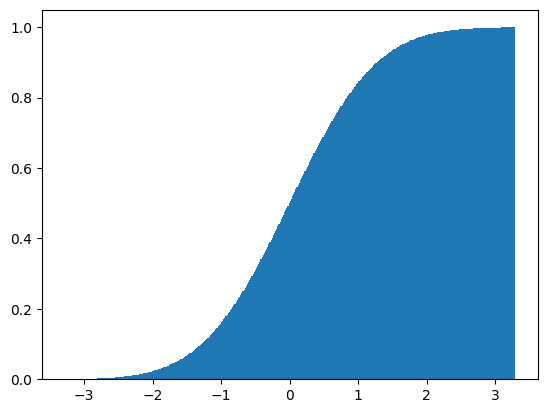

In [ ]:
b,h,_=plt.hist(omega,bins=400,cumulative=True,density=True)
h[np.searchsorted(b,r_0/2+0.5)+2]

In [ ]:
(1+1j).imag

1.0

In [ ]:
def shift(R0,Rp,K,m):
    Op = norm.ppf(R0/2+0.5)
    S1 = K**2*R0*Rp/(2*Op**2*m)
    S2 = K**2*Rp**2/(8*Op**2*m)
    return (S1+S2)+Op

def shift_new(R0,Rp,K,m):
    Op = norm.ppf(R0/2+0.5)
    a = 1/np.sqrt(Rp*K*m)
    b = Op/(K*Rp)
    me = (1/2)*(-1+1j*a**2/b)*(a**2/(a**4+b**2))
    b2 = 2*Op/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    S1 = K*R0*(-me.real)
    S2 = K*Rp*(-me2.real)
    return (S1+S2)+Op

def shift2(R0,Rp,K,m):
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    Op = norm.ppf(R0/2+0.5)
    S1 = K**2*R0*Rp/(2*O_r**2*m)
    S2 = K**2*Rp**2/(8*O_r**2*m)
    return O_r - 2*(S1+S2)

In [ ]:
O_pm = norm.ppf(R0/2+0.5)
O_pm

0.7549313281677067

In [ ]:
CMO

[0.0007046487673519107, -1.1121742440446096, 1.1285332522682336]

1.0454478424045714
1.039493770451628


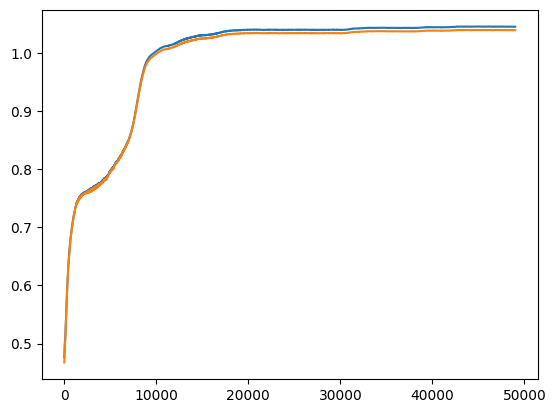

In [ ]:
R0s = rs_clu_mean['0']
Rps = rs_clu_mean['+']
plt.plot(shift(R0s,Rps,K,m))
plt.plot(shift_new(R0s,Rps,K,m))
print(shift(R0s,Rps,K,m)[-1])
print(shift_new(R0s,Rps,K,m)[-1])

In [ ]:
np.mean(np.where(omega[cluster_s['0']]))

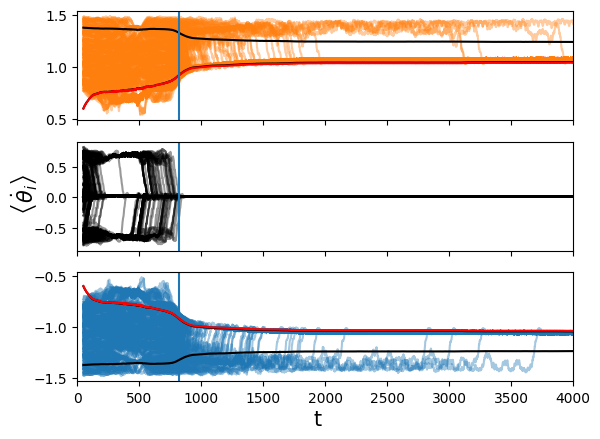

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
plt.sca(ax2)
plt.plot(t[sum_time:40000+sum_time:10],avg_dtheta_test[sum_time:40000+sum_time:10,cluster_s['0']],color='black',alpha=0.4)
plt.xlim(0, 4000)
plt.axvline(t[t_arg][0])

R0s = rs_clu_mean['0'][sum_time:40000+sum_time:10]
Rps = rs_clu_mean['+'][sum_time:40000+sum_time:10]
plt.sca(ax3)
plt.plot(t[sum_time:40000+sum_time:10],avg_dtheta_test[sum_time:40000+sum_time:10,cluster_s['-']],color='tab:blue',alpha=0.4)
plt.axvline(t[t_arg][0])
plt.plot(t[sum_time:40000+sum_time:10],-(shift(R0s,Rps,K,m)),color='black')
plt.plot(t[sum_time:40000+sum_time:10],-(shift_new(R0s,Rps,K,m)),color='red')
plt.plot(t[sum_time:40000+sum_time:10],-(shift2(R0s,Rps,K,m)),color='black')


plt.sca(ax1)
plt.plot(t[sum_time:40000+sum_time:10],avg_dtheta_test[sum_time:40000+sum_time:10,cluster_s['+']],color='tab:orange',alpha=0.4)

plt.plot(t[sum_time:40000+sum_time:10],shift(R0s,Rps,K,m),color='black')
plt.plot(t[sum_time:40000+sum_time:10],shift_new(R0s,Rps,K,m),color='red')
plt.plot(t[sum_time:40000+sum_time:10],shift2(R0s,Rps,K,m),color='black')

# plt.sca(ax1)
plt.axvline(t[t_arg][0])
fig.supxlabel('t',fontsize=15)
fig.supylabel(r'$\left\langle\dot{\theta}_i\right\rangle$',fontsize=15)
plt.show()

### MAKE RSTD

In [299]:
def Mtheta(R0,Rp,K,m):
    Op = norm.ppf(R0/2+0.5)
    a = 1/np.sqrt(Rp*K*m)
    b = Op/(K*Rp)
    me = (1/2)*(-1+1j*a**2/b)*(a**2/(a**4+b**2))
    b2 = 2*Op/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    return me

def cos_mean(R0,Rp,K,m):
    Os = shift(R0,Rp,K,m)
    a = 1/np.sqrt(R0*K*m)
    b = Os/(K*R0)
    me = (1/2)*(-1+1j*a**2/b)*(a**2/(a**4+b**2))
    b2 = 2*Os/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    return me.real

def cos_2mean(R0,Rp,K,m):
    Os = shift(R0,Rp,K,m)
    a = 1/np.sqrt(R0*K*m)
    b = Os/(K*R0)
    b2 = 2*Os/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    return me2.real

def get_rstd(R0,Rp,K,m):
    rstd = 2*np.sqrt(1/2-cos_2mean(R0,Rp,K,m)-cos_mean(R0,Rp,K,m)**2)*Rp
    return rstd

def get_rmean(R0,Rp,K,m):
    r_mean = R0 + 2*Rp*cos_mean(R0,Rp,K,m)
    return r_mean


In [ ]:
rs_mean

array([0.17960683, 0.18018794, 0.18076752, ..., 0.54646005, 0.5471683 ,
       0.54779936])

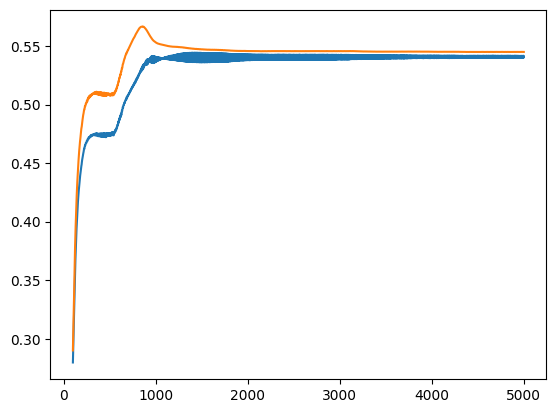

In [ ]:
plt.plot(t[sum_time:],rs_mean)
R0s = rs_clu_mean['0']#[sum_time:40000+sum_time:10]
Rps = rs_clu_mean['+']#[sum_time:40000+sum_time:10]
r_means = R0s + 2*Rps*cos_mean(R0s,Rps,K,m)
plt.plot(t[sum_time:],r_means)

In [ ]:
R0_ = rs_clu['0']
Rp_ = rs_clu['+']

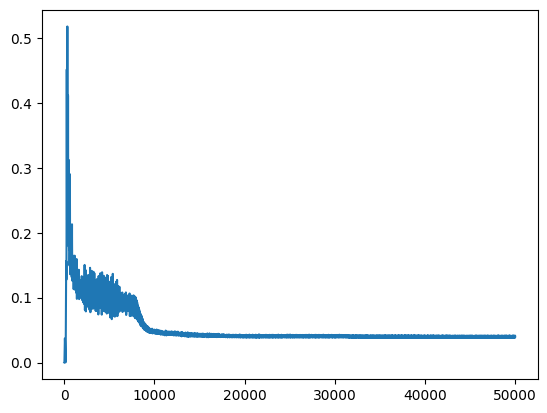

In [ ]:
plt.plot(cos_mean(R0_,Rp_,K,m)**2)

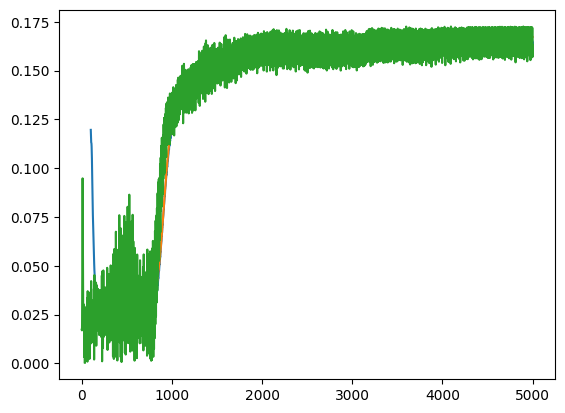

In [ ]:
plt.plot(t[sum_time:],rs_std)
r_std_mean = 2*np.sqrt(1/2-cos_2mean(R0s,Rps,K,m)-cos_mean(R0s,Rps,K,m)**2)*Rps
plt.plot(t[sum_time:],r_std_mean)
r_std = 2*np.sqrt(1/2-cos_2mean(R0_,Rp_,K,m)-cos_mean(R0_,Rp_,K,m)**2)*Rp_
plt.plot(t,r_std)

In [ ]:
m = 4

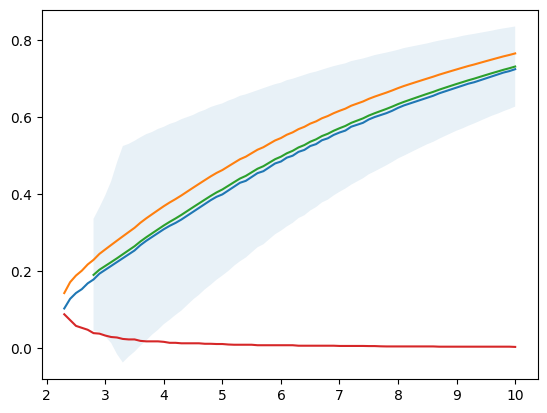

In [296]:
df_read = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])
r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
r_mus = df_read['r_main_u'].unstack()[m].to_numpy()

r_secds = df_read['r_sec_d'].unstack()[m].to_numpy()
r_secus = df_read['r_sec_u'].unstack()[m].to_numpy()

R_std = get_rstd(r_mus,r_secus,Ks,m)
R_mean = get_rmean(r_mus,r_secus,Ks,m)
plt.plot(Ks,r_us)
plt.plot(Ks,r_mus)
plt.plot(Ks,R_mean)
# plt.plot(Ks,R_std)
plt.fill_between(Ks,R_mean+R_std,R_mean-R_std,alpha=0.1)

plt.plot(Ks,r_ds)
# plt.plot(Ks,r_secds)
# plt.plot(Ks,r_secus)
# plt.axvline(K)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.Check_theoretical import Make_theoretical_KR

from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal
# del KR0

In [ ]:
import scipy.stats as SS
from scipy.integrate import quad
import scipy.stats as SS
def g_c(x):
    return SS.cauchy.pdf(x,0,1)
def g_n(x):
    return SS.norm.pdf(x,0,1)
def KR0(m,O_0,dist='normal'):
    X = np.logspace(np.log10(0.1),np.log10(50),num=1000,base=10)
    Ks = np.linspace(0.01,20,20000)
    if dist.upper() == "Normal".upper():
        g= g_n
    else:
        g= g_c
    # def r_0(X,m,g,O_0):
    #     O_d = min(O_0,X)
    #     theta_0 = np.arcsin(O_d/X)
    #     integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
    #     integrand_d = lambda x:(1/x**3)*g(x)
    #     I_l,err_l = quad(integrand_l,-theta_0,theta_0,limit=200) #lock
    #     I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
    #     r0 = X*I_l - X/(m**2)*I_d
    #     return r0
    def r_0(X,m,g,O_0):
        O_d = min(O_0,X)
        theta_0 = np.arcsin(O_d/X)
        integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
        integrand_d = lambda x,m=m:(1/(2*(1+(x*m)**2)))*g(x)
        I_l,err_l = quad(integrand_l,-theta_0,theta_0,limit=200) #lock
        I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
        r0 = X*I_l - X*2*m*I_d
        return r0
    # def r_0(X,m,g,O_0):
    #     O_d = min(O_0,X)
    #     theta_0 = np.arcsin(O_d/X)
    #     # integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
    #     def integrand_l(x,X=X):
    #         if (1-x**2/X**2)>0:
    #             return g(x)*(1-x**2/X**2)**0.5
    #         else:
    #             return 0
    #     # integrand_l = lambda x,X=X:g(x)*(np.max(0,(1-x**2/X**2)))**0.5

    #     integrand_d = lambda x,m=m:(1/(2*(1+(x*m)**2)))*g(x)
    #     I_l,err_l = quad(integrand_l,0,max(0,O_d),limit=200) #lock
    #     I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
    #     r0 = 2*I_l - 2*X*m*I_d
    # r_0 = np.vectorize(r_0)

    r_before = r_0(X,m,g,O_0)
    KB =[]
    RB =[]
    for K_  in  Ks:
        TEMP_2 = (X/K_)[abs(r_before-X/K_)<2e-4]
        if len(TEMP_2)!=0:
            for R_ in TEMP_2:
                KB.append(K_)
                RB.append(R_)
    (K_under,R_under),(K_over,R_over) = split_uo(KB,RB)
    return (K_under,R_under),(K_over,R_over)

In [287]:
folder = '230721 statphys poster/TLO/'
# df_TLO = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])
name = 'normal'

In [ ]:
df_f_cluster = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 {name} cluster TLO.xlsm',index_col=[0,1])


In [ ]:
cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4','c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel','c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel','c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [ ]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)

In [ ]:
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks
def to_maxomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        cluster -= np.mean(cluster)
        return np.max(abs(cluster))
    else: return np.nan

def KR_underK(set,K):
    Ks,Rs = set
    K_ = Ks[Ks<K] 
    R_ = Rs[Ks<K] 
    return (K_,R_)

In [288]:
# K_backs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
K_backs = [3,4,5,6,10,15]
# K_backs = [3,4,6,10,15]

df_b_dick = {}
for K_back in  K_backs:
    df_b_dick[K_back] = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal {K_back}-0 TLO.xlsm',index_col=[0,1])
    
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']
df = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])


In [ ]:
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
def get_nearest_KR(R,F_new):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    return F_K[r_idx],F_R[r_idx]
def get_near_o(R,F_new,m):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    K_new,r_new = F_K[r_idx],F_R[r_idx]
    O = O_p(K_new*r_new,m)
    return O

In [ ]:
m_to_draw = 6

KF,RF,KB,RB= KR(m_to_draw)
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)

In [ ]:
df_6,Ks = to_mdf(df,m_to_draw)
K_rs = df_6.r
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
O_ps = (K_rs*Ks).apply(O_p,m=m_to_draw)
O_ps_n = K_rs.apply(get_near_o,F_new=F_new,m=m_to_draw)

df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
max_o = df_m_cluster['c0 list'].apply(to_maxomega)

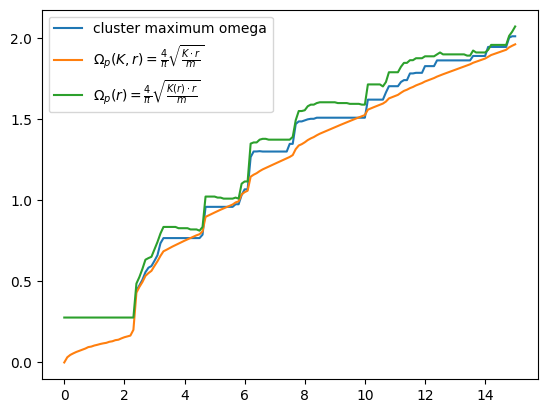

In [ ]:
plt.plot(Ks,max_o,label = r'cluster maximum omega')
plt.plot(Ks,O_ps,label = r'$\Omega_p(K,r) = \frac{4}{\pi}\sqrt{\frac{K\cdot r}{m}}$')
plt.plot(Ks,O_ps_n,label=r'$\Omega_p(r) = \frac{4}{\pi}\sqrt{\frac{K(r)\cdot r}{m}}$')
plt.legend()

In [ ]:
D_sets_op_n = {}
U_sets_op_n = {}
for K in K_backs:
    O = O_ps_n.iloc[int(K*10)]
    O_ = max_o.loc[K]
    if ~np.isnan(O_):
        D,U = KR0(m_to_draw,O)
        D_sets_op_n[K] = D
        U_sets_op_n[K] = U

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
backs_r = []
backs_K = []
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()
    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])

In [ ]:
plt.ax

In [ ]:
D_sets_op_B = {}
U_sets_op_B = {}
for K,r in zip(backs_K,backs_r):
    O = get_near_o(r,F_new,m_to_draw)
    D,U = KR0(m_to_draw,O)
    D_sets_op_B[K] = D
    U_sets_op_B[K] = U


In [ ]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [289]:
# df = pd.read_excel(f'N = 500 Q_Normal seed = 10 dt = 0.1 230821 ver3.xlsm',index_col=[0,1])
df = pd.read_excel(f'230721 statphys poster/TLO/N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])



In [293]:
ms = df_read['r_mean_d'].unstack().columns
num =81
m = ms[num]

(0.0, 0.9846593116390725)

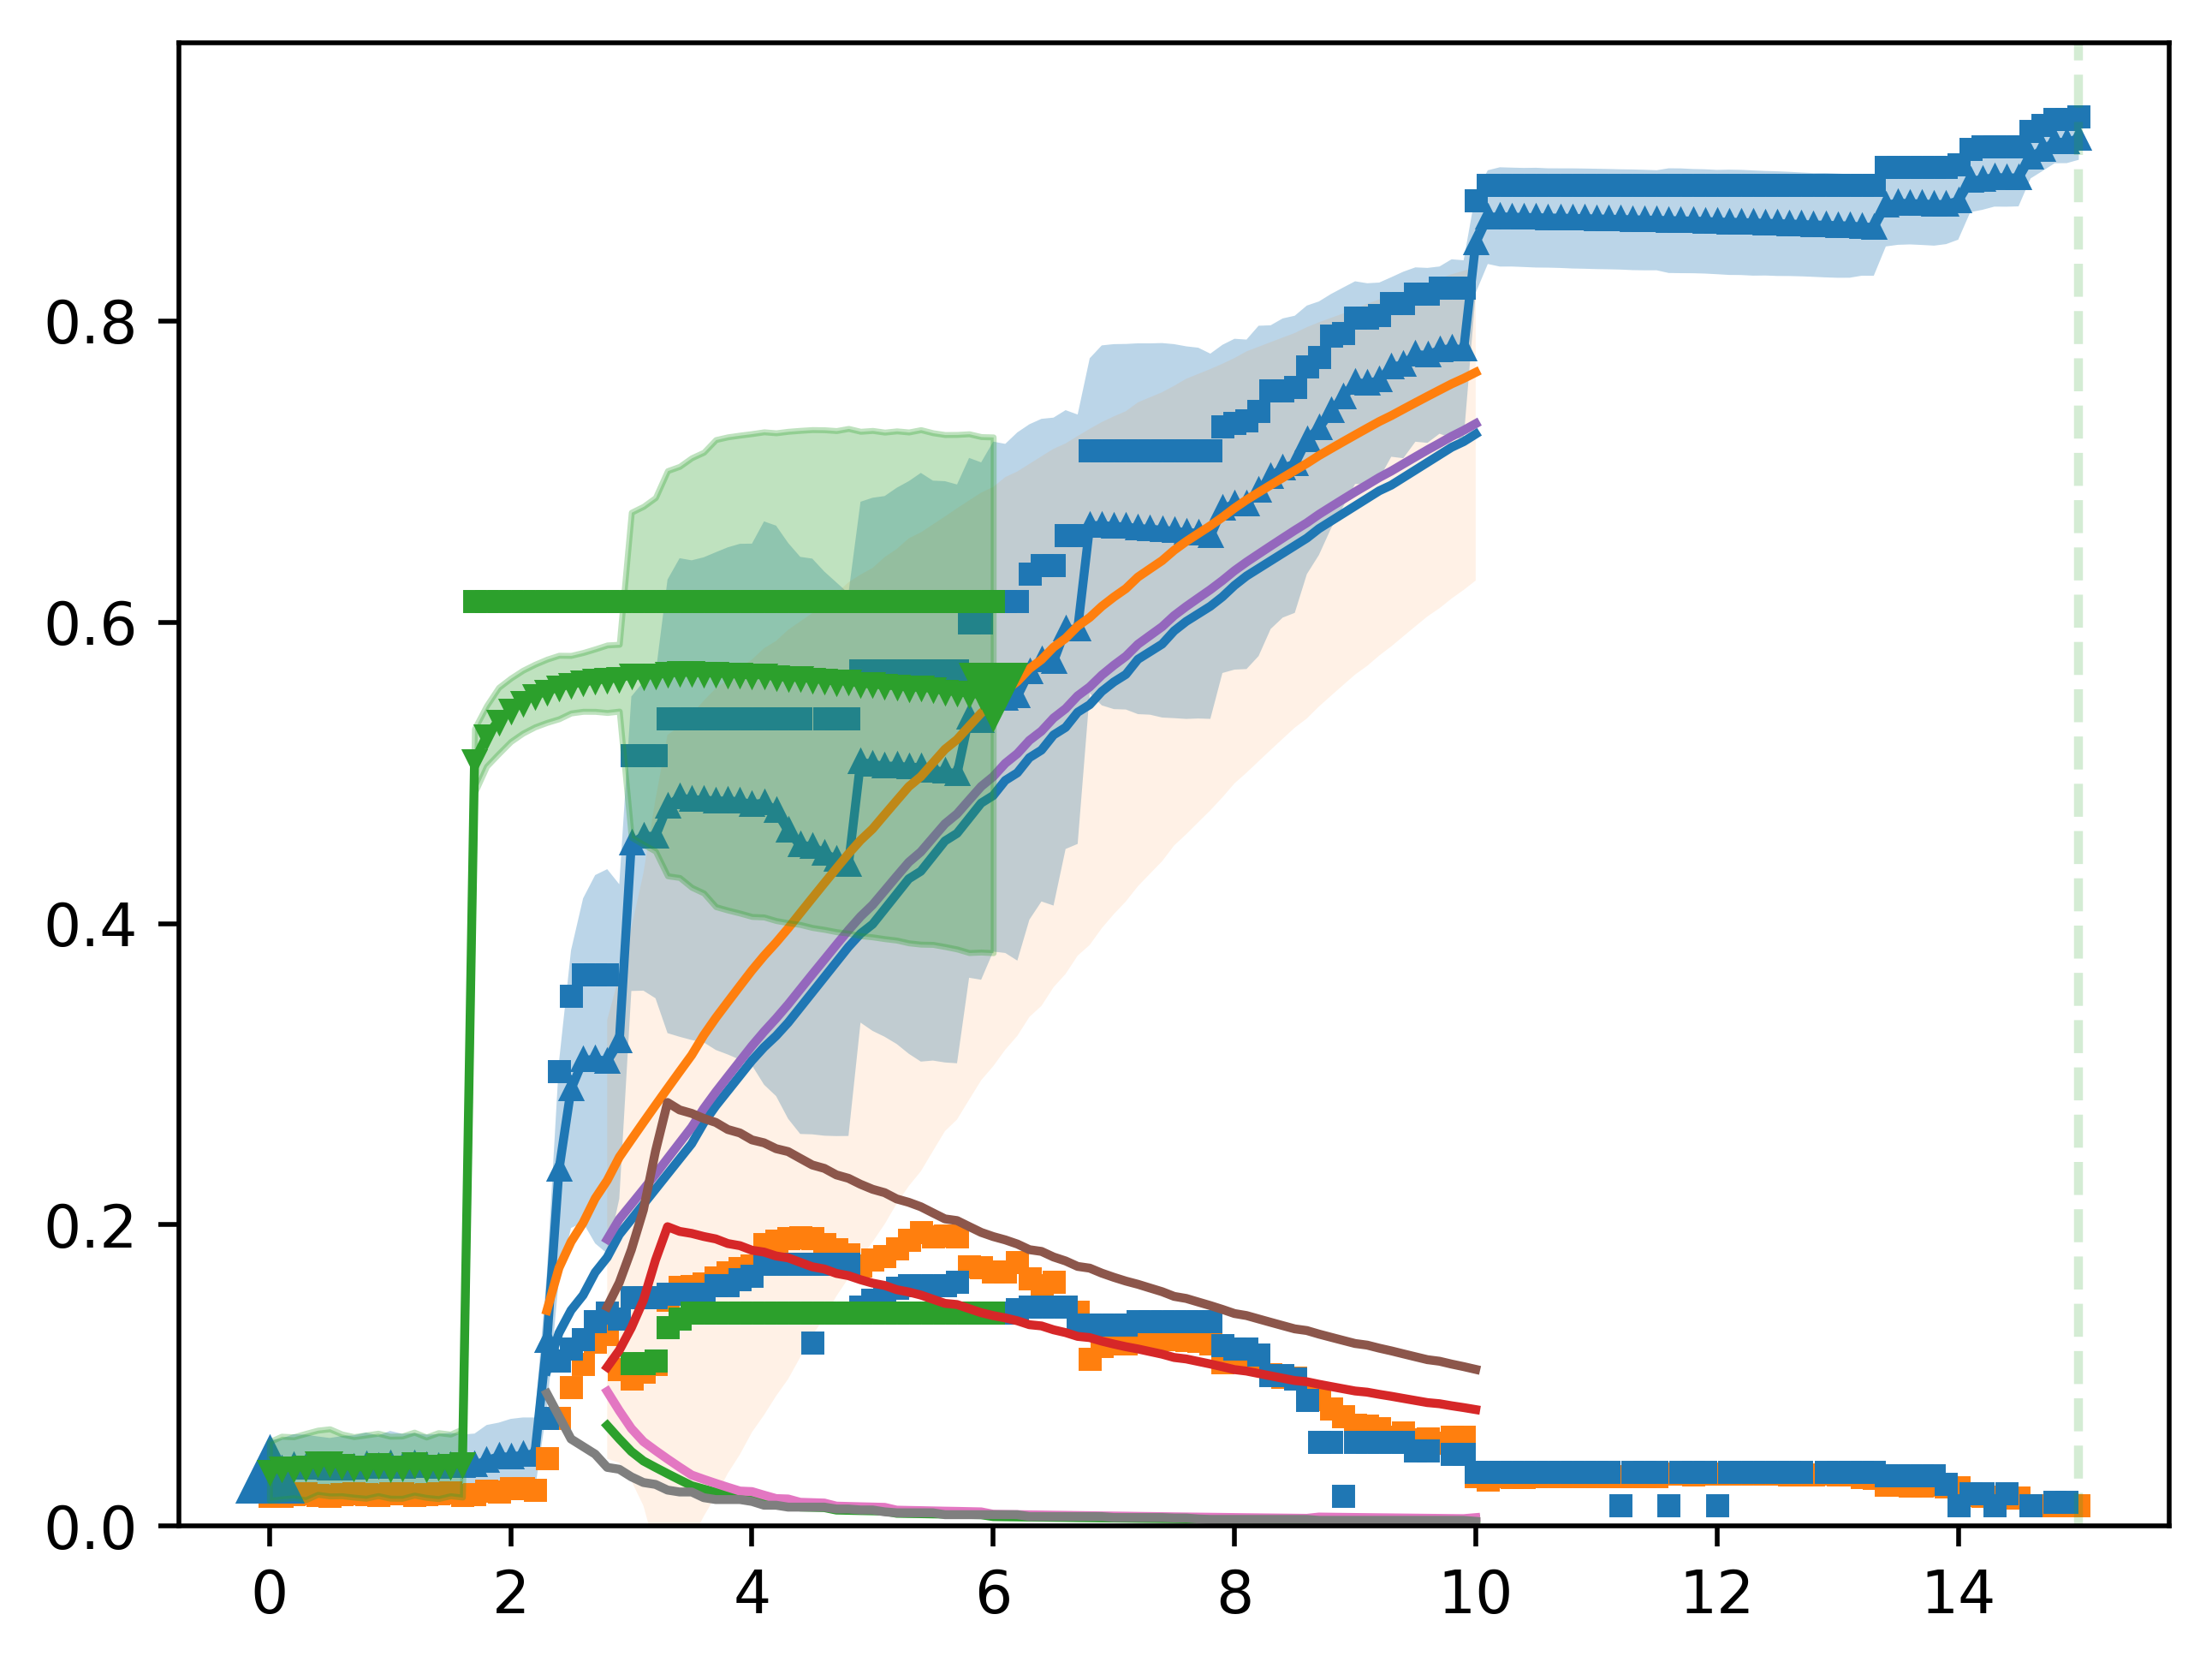

In [299]:
plt.figure(figsize=(6,4.5),dpi=500)
ms = np.sort(df.reset_index().m.unique())
re_df = df.reset_index()

df_m = re_df[re_df.m == ms[num+1]]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
c1 = df_m.c1.to_numpy()
c0 = df_m.c0.to_numpy()
lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.plot(Ks,rstd,'s',label=r'$\sigma$',color = 'tab:orange',markersize=3)
plt.plot(Ks,c1/500,'s',label=r'$\sigma$',color = 'tab:blue',markersize=3)
plt.plot(Ks,c0/500,'s',label=r'$\sigma$',color = 'tab:blue',markersize=3)
# plt.legend([(lf,ff)],K_backs,title=f'Backward')
df_read = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])


df_b = df_b_dick[6]
ms = df_b.reset_index().m.unique()
re_df = df_b.reset_index()

df_m = re_df[re_df.m == ms[num+1]]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
plt.axvline(K_back,ls= '--',color =  'tab:green',alpha=0.2)   
plt.plot(Ks,rs,'-',color =  'tab:green',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
plt.plot(Ks[:],rs[:],'v',color =  'tab:green',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
plt.plot(Ks[-1],rs[-1],'v',color =  'tab:green',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num,color =  'tab:green')
c1 = df_m.c1.to_numpy()
c0 = df_m.c0.to_numpy()

plt.plot(Ks,c1/500,'s',label=r'$\sigma$',color = 'tab:green',markersize=3)
plt.plot(Ks,c0/500,'s',label=r'$\sigma$',color = 'tab:green',markersize=3)
# Ku,Ru = U_sets_op_B[K_back]

Ks = np.arange(0.1,10.05,0.1)
r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
r_mus = df_read['r_main_u'].unstack()[m].to_numpy()

r_secds = df_read['r_sec_d'].unstack()[m].to_numpy()
r_secus = df_read['r_sec_u'].unstack()[m].to_numpy()

R_stdu = get_rstd(r_mus,r_secus,Ks,m)
R_stdd = get_rstd(r_mus,r_secds,Ks,m)
R_mean = get_rmean(r_mus,r_secus,Ks,m)
plt.plot(Ks,r_us)
plt.plot(Ks,r_mus)
plt.plot(Ks,r_secds)
plt.plot(Ks,r_secus)
plt.plot(Ks,R_mean)
# plt.plot(Ks,R_std)
plt.plot(Ks,R_stdu)
plt.plot(Ks,R_stdd)
plt.fill_between(Ks,R_mean+R_std,R_mean-R_std,alpha=0.1)

plt.plot(Ks,r_ds)
plt.ylim(0)
# plt.plot(Ks,r_secds)
# plt.plot(Ks,r_secus)
# plt.axvline(K)

## Self consistent equation RE

In [9]:

import numpy as np
import pandas as pd
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian

from scipy.integrate import quad
from scipy.stats import norm
from numba import jit
from scipy import interpolate
import matplotlib.pyplot as plt

In [135]:
def g_n(x):
    return norm.pdf(x,0,1)
def FX_lock1(X,m,g=g_n):
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return I_l
    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return I_l

def FX_drift1(X,m,g=g_n):
    if m == 0:
        return 0
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -1/(m)*I_d

def FX_0(X,m,O_0,g=g_n):
        O_d = min(O_0,X)
        theta_0 = np.arcsin(O_d/X)
        integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
        integrand_d = lambda x:(1/x**2)*g(x)
        I_l,err_l = quad(integrand_l,-theta_0,theta_0,limit=200) #lock
        I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
        Fl = 1*I_l
        Fd = - 1/(m)*I_d
        F0 = Fl + Fd
        return F0,Fl,Fd
get_FX_l1 = np.vectorize(FX_lock1)
get_FX_d1 = np.vectorize(FX_drift1)
get_FX_0 = np.vectorize(FX_0)


def g_sec(x,Or,Om):
    g = norm.pdf(x,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

def get_O_r(r):
    r_s = np.linspace(r/2+0.5,1,5000,endpoint=False)
    A = norm.ppf(r_s)
    return np.mean(A)

def F_lock2(r,K,m,F_R0, g=g_sec):
    X = K*r
    r_0 = F_R0(K)
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = get_O_r(r_0)
    shift = -(K**2*r*r_0)/(2*(O_pm)**2)/m -(K**2*r*r)/(8*(O_pm+X)**2)/m 

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift,O_r,O_pm)
    O_p = (4/np.pi)*np.sqrt(X/m)

    A = O_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return I_l
    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return I_l    
    

def F_drift2(r,K,m,F_R0,g=g_sec):
    X = K*r
    r_0 = F_R0(K)
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = get_O_r(r_0)
    O_p = (4/np.pi)*np.sqrt(X/m)
    shift = -(K**2*r*r_0)/(2*(O_pm)**2)/m -(K**2*r*r)/(8*(O_pm+X)**2)/m 

    integrand_drift = lambda x:1/(2*x**2)*g(x+shift,O_r,O_pm)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    I_dm,err = quad(integrand_drift,-np.inf,-O_p,limit=200)
    return -1/(2*m)*(I_d+I_dm)


def F_sec(r,K,m,F_R0,g=g_sec):
    F_l2 = F_lock2(r,K,m,F_R0, g)
    F_d2 = F_drift2(r,K,m,F_R0, g)
    return F_l2+F_d2


def F_lock2_D(r,K,m,R_0, g=g_sec):
    X = K*r
    r_0 = R_0
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = get_O_r(r_0)
    shift = -(K**2*r*r_0)/(2*(O_pm)**2)/m -(K**2*r*r)/(8*(O_pm+X)**2)/m 

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift,O_r,O_pm)
    O_p = (4/np.pi)*np.sqrt(X/m)

    A = O_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return I_l
    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return I_l    

def F_drift2_D(r,K,m,R_0,g=g_sec):
    X = K*r
    r_0 = R_0
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = get_O_r(r_0)
    O_p = (4/np.pi)*np.sqrt(X/m)
    shift = -(K**2*r*r_0)/(2*(O_pm)**2)/m -(K**2*r*r)/(8*(O_pm+X)**2)/m 

    integrand_drift = lambda x:1/(2*x**2)*g(x+shift,O_r,O_pm)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    I_dm,err = quad(integrand_drift,-np.inf,-O_p,limit=200)
    return -1/(m)*(I_d+I_dm)
def F_sec_D(r,K,m,R_0,g=g_sec):
    F_l2 = F_lock2_D(r,K,m,R_0, g)
    F_d2 = F_drift2_D(r,K,m,R_0, g)
    return F_l2+F_d2


def check_F_sec(r,K,m,F_R0,g=g_sec):
    F_l2 = F_lock2(r,K,m,F_R0, g)
    F_d2 = F_drift2(r,K,m,F_R0, g)
    return F_l2+F_d2 -1/K

def Bisection(f,a,b,eps =1e-5,end=30,arg=()):
    c = (a+b)/2
    num = 0 
    while abs(f(c,*arg))>eps:
        c = (a+b)/2
        if f(a,*arg)*f(c,*arg)>0:a = c
        else:b = c
        num+=1
        if num >end:return np.NAN
    return c


get_Fp_l = np.vectorize(F_lock2)
get_Fp_d = np.vectorize(F_drift2)
get_F2 = np.vectorize(F_sec)
get_F2_D = np.vectorize(F_sec_D)

In [35]:
def Make_R_function(m,K_max=15):
    X = np.linspace((0.01),(20),num=3000)
    RX_l1 = X*get_FX_l1(X,m,g=g_n)
    RX_d1 = X*get_FX_d1(X,m,g=g_n)
    RX_F = RX_l1 + RX_d1
    R = RX_l1 + RX_d1
    IK = np.nanmax((R/X))
    Kb =1/IK
    rb = X[np.nanargmax((R/X))]*IK

    Ks = np.linspace(0.5,K_max+0.1,50000)
    A = np.where(np.abs(RX_F*Ks.reshape(-1,1)-X)<5e-5)
    RR = RX_F*np.ones_like(Ks.reshape(-1,1))
    KK = np.ones_like(RX_F)*Ks.reshape(-1,1)

    RR_0 = RX_l1*np.ones_like(Ks.reshape(-1,1))
    U,= np.where(RR[A] >= rb)
    D,= np.where(RR[A] < rb)
    Ku = KK[A][U]
    Kd = KK[A][D]
    Ku,Ku_idx,c=np.unique(Ku,return_counts=True,return_index=True)
    Kd,Kd_idx,c=np.unique(Kd,return_counts=True,return_index=True)

    F_RMu = interpolate.interp1d(KK[A][U][Ku_idx], RR[A][U][Ku_idx], kind='quadratic',bounds_error=False)
    F_R0u = interpolate.interp1d(KK[A][U][Ku_idx], RR_0[A][U][Ku_idx], kind='quadratic',bounds_error=False)
    F_RMd = interpolate.interp1d(KK[A][D][Kd_idx], RR[A][D][Kd_idx], kind='quadratic',bounds_error=False)
    F_R0d = interpolate.interp1d(KK[A][D][Kd_idx], RR_0[A][D][Kd_idx], kind='quadratic',bounds_error=False)
    return F_RMd,F_RMu,F_R0d,F_R0u

def Make_R0_function(m,O_0,K_max=15):
    X = np.linspace((0.01),(20),num=3000)
    F0,Fl,Fd = get_FX_0(X,m,O_0,g=g_n)
    RX_l1 = X*Fl
    RX_d1 = X*Fd
    RX_F = RX_l1 + RX_d1
    R = RX_l1 + RX_d1
    IK = np.nanmax((R/X))
    Kb =1/IK
    rb = X[np.nanargmax((R/X))]*IK

    Ks = np.linspace(0.5,K_max+0.1,50000)
    A = np.where(np.abs(RX_F*Ks.reshape(-1,1)-X)<5e-5)
    RR = RX_F*np.ones_like(Ks.reshape(-1,1))
    KK = np.ones_like(RX_F)*Ks.reshape(-1,1)

    RR_0 = RX_l1*np.ones_like(Ks.reshape(-1,1))
    U,= np.where(RR[A] >= rb)
    D,= np.where(RR[A] < rb)
    Ku = KK[A][U]
    Kd = KK[A][D]
    Ku,Ku_idx,c=np.unique(Ku,return_counts=True,return_index=True)
    Kd,Kd_idx,c=np.unique(Kd,return_counts=True,return_index=True)

    F_RMu = interpolate.interp1d(KK[A][U][Ku_idx], RR[A][U][Ku_idx], kind='quadratic',bounds_error=False)
    F_R0u = interpolate.interp1d(KK[A][U][Ku_idx], RR_0[A][U][Ku_idx], kind='quadratic',bounds_error=False)
    F_RMd = interpolate.interp1d(KK[A][D][Kd_idx], RR[A][D][Kd_idx], kind='quadratic',bounds_error=False)
    F_R0d = interpolate.interp1d(KK[A][D][Kd_idx], RR_0[A][D][Kd_idx], kind='quadratic',bounds_error=False)
    return F_RMd,F_RMu,F_R0d,F_R0u


In [287]:
F_RMd,F_RMu,F_R0d,F_R0u =  Make_R_function(m)

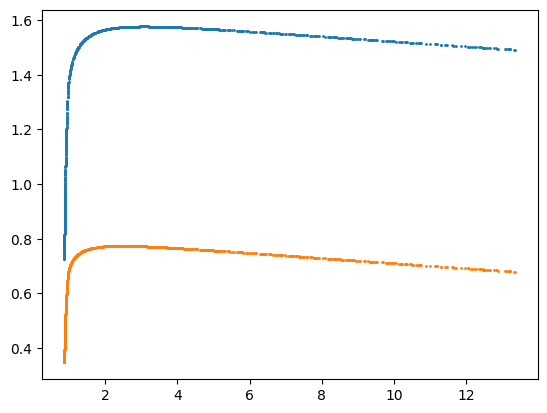

In [773]:
plt.scatter(KK[A][U],RR[A][U],s=1)

plt.scatter(KK[A][U],RR_0[A][U],s=1)
# plt.axhline(rb)
# plt.axvline(Kb)

(0.0, 0.9681157017674555)

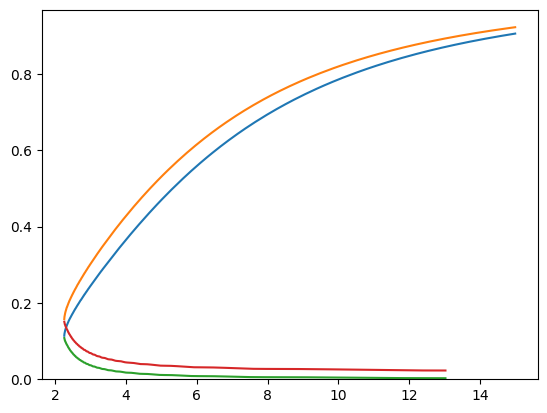

In [306]:
K_u = np.linspace(0,15,10000)
K_d = np.linspace(0,15,10000)
plt.plot(K_u,F_RMu(K_u))
plt.plot(K_u,F_R0u(K_u))

plt.plot(K_d,F_RMd(K_d))
plt.plot(K_d,F_R0d(K_d))
plt.ylim(0)

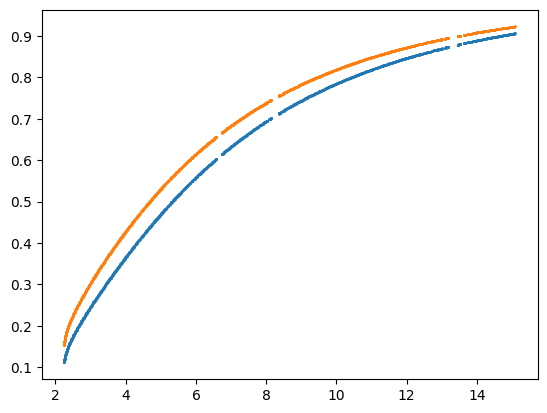

In [290]:
plt.scatter(KK[A][U],RR[A][U],s=1)

plt.scatter(KK[A][U],RR_0[A][U],s=1)
# plt.axhline(rb)
# plt.axvline(Kb)

In [583]:
norm.pdf(1,-np.nan,1)

nan

In [38]:
from numba import jit

In [100]:
rp = np.linspace(1e-4,(1-rb)/2,2000)
K_u = np.arange(min(Ku),max(Ku),1000)
np.diff(K_u)[0]

0.013134416842490948

In [ ]:
plt.plot()

In [ ]:
from knockknock import desktop_sender


@desktop_sender(title="Knockknock Desktop Notifier")
def end():pass
end()

In [122]:
m

6

In [152]:
K
# F_R0u(K)

array([0.1       , 0.17959184, 0.25918367, 0.33877551, 0.41836735,
       0.49795918, 0.57755102, 0.65714286, 0.73673469, 0.81632653,
       0.89591837, 0.9755102 , 1.05510204, 1.13469388, 1.21428571,
       1.29387755, 1.37346939, 1.45306122, 1.53265306, 1.6122449 ,
       1.69183673, 1.77142857, 1.85102041, 1.93061224, 2.01020408,
       2.08979592, 2.16938776, 2.24897959, 2.32857143, 2.40816327,
       2.4877551 , 2.56734694, 2.64693878, 2.72653061, 2.80612245,
       2.88571429, 2.96530612, 3.04489796, 3.1244898 , 3.20408163,
       3.28367347, 3.36326531, 3.44285714, 3.52244898, 3.60204082,
       3.68163265, 3.76122449, 3.84081633, 3.92040816, 4.        ])

In [159]:
float(r0_)

0.5977617791160519

In [110]:
# K = 2.817
def get_r_sec(K,m,FR,samples=200):
    r0_ =  FR(K)
    r_sd,r_su = np.nan,np.nan
    r_su_d,r_su_l = np.nan,np.nan
    if K == 0:
        return r_sd,r_su
    r_test = np.linspace(1e-5,(1-r0_)/2,samples)
    F2 = get_F2(r_test,K,m,FR)
    R2_interpolate  = interpolate.interp1d(r_test,F2, kind='linear',bounds_error=False)
    r_test2 = np.linspace(1e-5,(1-r0_)/2,10000)
    Fs = R2_interpolate(r_test2)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)

    r_sec = (r_test2[arg_check] +r_test2[arg_check+1])/2
    if len(r_sec)==2:
        r_sd,r_su = r_sec
    if len(r_sec)==1:
        r_su = r_sec
    #r_sd_l = r_sd*K*F_lock2(r_sd,K,m,F_R0=FR,g=g_sec)
    return r_sd,r_su#,r_su_d#,r_sd_l,r_su_l
get_r_sec_np = np.vectorize(get_r_sec)


# K = 2.817
def get_r_sec_D(K,m,R_0,samples=200):
    r0_ =  R_0
    r_sd,r_su = np.nan,np.nan
    r_su_d,r_su_l = np.nan,np.nan
    if K == 0:
        return r_sd,r_su
    r_test = np.linspace(1e-5,(1-r0_)/2,samples)
    F2 = get_F2_D(r_test,K,m,R_0)
    R2_interpolate  = interpolate.interp1d(r_test,F2, kind='linear',bounds_error=False)
    r_test2 = np.linspace(1e-5,(1-r0_)/2,10000)
    Fs = R2_interpolate(r_test2)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)

    r_sec = (r_test2[arg_check] +r_test2[arg_check+1])/2
    if len(r_sec)==2:
        r_sd,r_su = r_sec
    if len(r_sec)==1:
        r_su = r_sec
    #r_sd_l = r_sd*K*F_lock2(r_sd,K,m,F_R0=FR,g=g_sec)
    return r_sd,r_su#,r_su_d#,r_sd_l,r_su_l
get_r_sec_D_np = np.vectorize(get_r_sec_D)

In [376]:
m = 5.5
F_RMd,F_RMu,F_R0d,F_R0u =  Make_R_function(m)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_97039/2097786760.py:13: RuntimeWarning: invalid value encountered in arcsin
  theta_p = np.arcsin(A)


In [428]:
Ks = np.arange(0.1,15,0.2)
# rs_d,rs_u,rs_d_l,rs_u_l= get_r_sec_np(Ks,m,F_R0u,samples=50)
rs_d2,rs_u2= get_r_sec_np(Ks,m,F_R0u,samples=30)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_97039/2883027878.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_97039/2883027878.py:38: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_97039/2883027878.py:39: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_dm,err = quad(integrand_drift,-np.inf,-O_p,limit=200)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

(0.0, 0.19212975340196906)

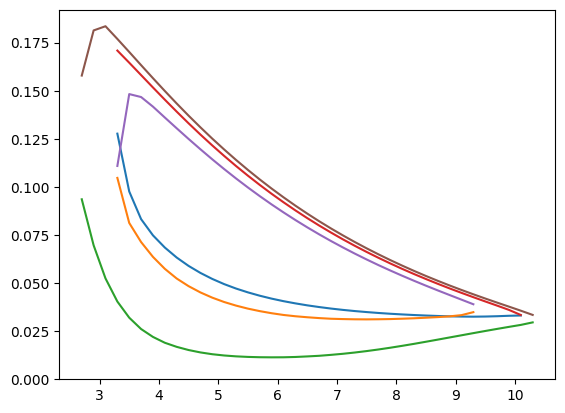

In [403]:
Ks = np.arange(0.1,15,0.2)

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,F_R0d(Ks))
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_d2)
plt.plot(Ks,rs_d4)
# plt.plot(Ks,rs_d2)
plt.plot(Ks,rs_u)
plt.plot(Ks,rs_u2)
plt.plot(Ks,rs_u4)
# plt.plot(Ks,rs_d_l)
# plt.plot(Ks,rs_u_l)
plt.ylim(0)

In [33]:
plt.plot(Ks,F_R0u(Ks))
plt.plot(Ks,F_R0d(Ks))
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)
plt.ylim(0)

NameError: name 'F_R0u' is not defined

In [537]:
plt.plot(X,X*FX_F)
plt.plot(X,X*FX_l1)
plt.plot(X,X*FX_d1)

ValueError: operands could not be broadcast together with shapes (3000,) (1000,) 

In [362]:
Ks,X*FX_F

(array([1.00000000e-02, 1.14995750e-02, 1.29991500e-02, ...,
        2.99970009e+01, 2.99985004e+01, 3.00000000e+01]),
 array([0.03034012, 0.03060518, 0.03087192, 0.03114032, 0.03141042,
        0.03168221, 0.0319557 , 0.0322309 , 0.03250783, 0.03278649,
        0.0330669 , 0.03334905, 0.03363297, 0.03391866, 0.03420613,
        0.03449539, 0.03478645, 0.03507932, 0.03537402, 0.03567054,
        0.03596891, 0.03626913, 0.03657121, 0.03687516, 0.037181  ,
        0.03748873, 0.03779836, 0.03810991, 0.03842338, 0.03873878,
        0.03905613, 0.03937544, 0.03969671, 0.04001996, 0.0403452 ,
        0.04067244, 0.0410017 , 0.04133297, 0.04166627, 0.04200162,
        0.04233903, 0.0426785 , 0.04302005, 0.04336369, 0.04370942,
        0.04405727, 0.04440725, 0.04475936, 0.04511361, 0.04547002,
        0.04582861, 0.04618937, 0.04655233, 0.0469175 , 0.04728488,
        0.04765449, 0.04802634, 0.04840045, 0.04877683, 0.04915548,
        0.04953642, 0.04991967, 0.05030523, 0.05069312, 0.0510833

In [358]:
FX_F * Ks

ValueError: operands could not be broadcast together with shapes (1000,) (20000,) 

In [ ]:
df = pd.read_excel(f'230721 statphys poster/TLO/N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])


In [5]:
def get_shift(R0,Rp,K,m):
    Op = norm.ppf(R0/2+0.5)
    S1 = K**2*R0*Rp/(2*Op**2*m)
    S2 = K**2*Rp**2/(8*Op**2*m)
    return (S1+S2)+Op

def shift_new(R0,Rp,K,m):
    Op = norm.ppf(R0/2+0.5)
    a = 1/np.sqrt(Rp*K*m)
    b = Op/(K*Rp)
    me = (1/2)*(-1+1j*a**2/b)*(a**2/(a**4+b**2))
    b2 = 2*Op/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    S1 = K*R0*(-me.real)
    S2 = K*Rp*(-me2.real)
    return (S1+S2)+Op

def shift2(R0,Rp,K,m):
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    Op = norm.ppf(R0/2+0.5)
    S1 = K**2*R0*Rp/(2*O_r**2*m)
    S2 = K**2*Rp**2/(8*O_r**2*m)
    return O_r - 2*(S1+S2)

def Mtheta(R0,Rp,K,m):
    Op = norm.ppf(R0/2+0.5)
    a = 1/np.sqrt(Rp*K*m)
    b = Op/(K*Rp)
    me = (1/2)*(-1+1j*a**2/b)*(a**2/(a**4+b**2))
    b2 = 2*Op/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    return me

def cos_mean(R0,Rp,K,m):
    Os = get_shift(R0,Rp,K,m)
    a = 1/np.sqrt(R0*K*m)
    b = Os/(K*R0)
    me = (1/2)*(-1+1j*a**2/b)*(a**2/(a**4+b**2))
    b2 = 2*Os/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    return me.real

def cos_2mean(R0,Rp,K,m):
    Os = get_shift(R0,Rp,K,m)
    a = 1/np.sqrt(R0*K*m)
    b = Os/(K*R0)
    b2 = 2*Os/(K*Rp)
    me2 = (1/2)*(-1+1j*a**2/b2)*(a**2/(a**4+b2**2))
    return me2.real

def get_rstd(R0,Rp,K,m):
    rstd = 2*np.sqrt(1/2-cos_2mean(R0,Rp,K,m)-cos_mean(R0,Rp,K,m)**2)*Rp
    return rstd

def get_rmean(R0,Rp,K,m):
    r_mean = R0 + 2*Rp*cos_mean(R0,Rp,K,m)
    return r_mean


In [ ]:
K_backs = [3,4,5,6,10,15]

In [323]:
ms = df_read['r_mean_d'].unstack().columns
num =54
m = ms[num]
m

5.5

(0.0, 1.014218903453449)

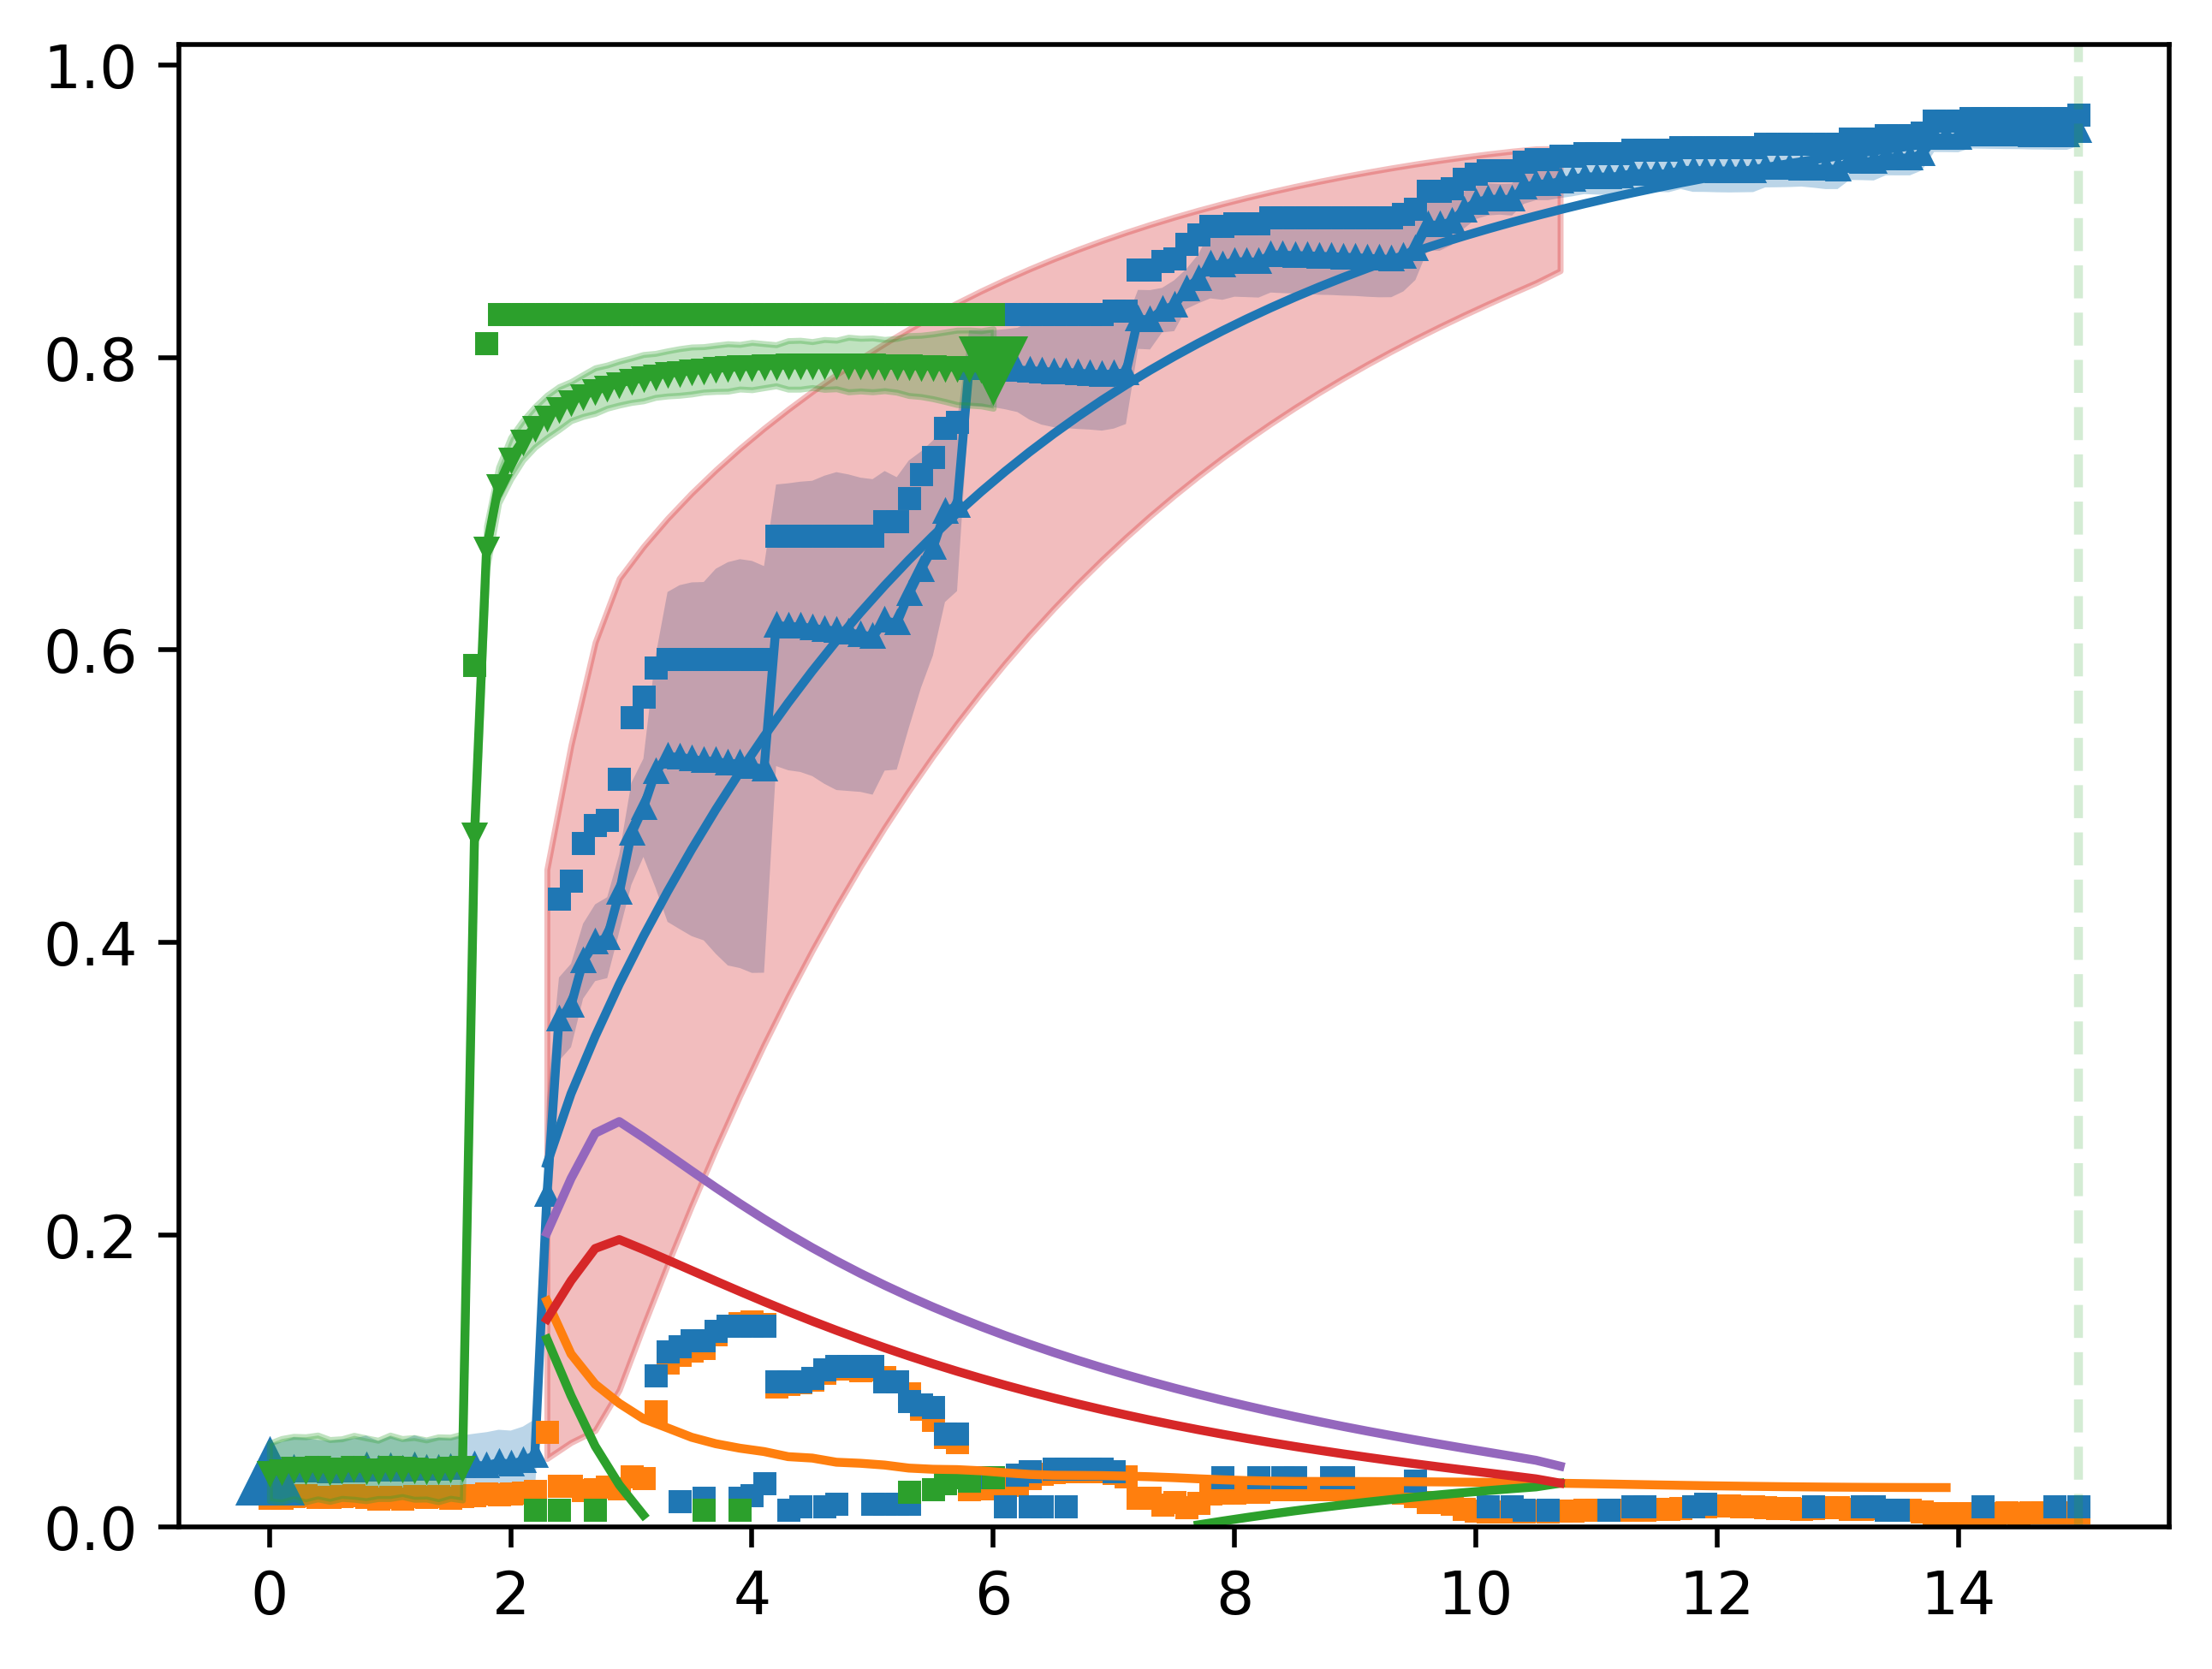

In [347]:
ms = df_read['r_mean_d'].unstack().columns
num =54
m = ms[num]
plt.figure(figsize=(6,4.5),dpi=500)
ms = np.sort(df.reset_index().m.unique())
re_df = df.reset_index()

df_m = re_df[re_df.m == ms[num+1]]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
c3 = df_m.c3.to_numpy()
c1 = df_m.c1.to_numpy()
c0 = df_m.c0.to_numpy()
lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.plot(Ks,rstd,'s',label=r'$\sigma$',color = 'tab:orange',markersize=3)
plt.plot(Ks,c1/500,'s',label=r'$\sigma$',color = 'tab:blue',markersize=3)
plt.plot(Ks,c0/500,'s',label=r'$\sigma$',color = 'tab:blue',markersize=3)
plt.plot(Ks,c3/500,'s',label=r'$\sigma$',color = 'tab:blue',markersize=3)
# plt.legend([(lf,ff)],K_backs,title=f'Backward')
df_read = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])


df_b = df_b_dick[6]
ms = df_b.reset_index().m.unique()
re_df = df_b.reset_index()

df_m = re_df[re_df.m == ms[num+1]]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
plt.axvline(K_back,ls= '--',color =  'tab:green',alpha=0.2)   
plt.plot(Ks,rs,'-',color =  'tab:green',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
plt.plot(Ks[:],rs[:],'v',color =  'tab:green',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
plt.plot(Ks[-1],rs[-1],'v',color =  'tab:green',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num,color =  'tab:green')
c1 = df_m.c1.to_numpy()
c0 = df_m.c0.to_numpy()

plt.plot(Ks,c1/500,'s',label=r'$\sigma$',color = 'tab:green',markersize=3)
plt.plot(Ks,c0/500,'s',label=r'$\sigma$',color = 'tab:green',markersize=3)
# Ku,Ru = U_sets_op_B[K_back]
Ks = np.arange(0.1,15,0.2)
R_STD = get_rstd(F_R0u(Ks),rs_u,K,m)
plt.plot(Ks,F_R0u(Ks))
plt.plot(Ks,F_R0d(Ks))
plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:red')
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)
plt.plot(Ks,R_STD)
plt.ylim(0)

## TLO Graph

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
RK4_jit = IJ.RK4

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
RK4_jit = IJ.RK4

In [ ]:
class Q_Norm_simul():
    def __init__(self,N,K,m,dt = 0.1,t_end = 5000,seed = 10) -> None:
        '''input : N,K,m,dt. dt, t_end,seed'''
        theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
        omega = np.sort(omega)-np.mean(omega)
        self.N = N; self.K = K; self.m = m;self.dt = dt
        self.t_end = t_end; self.dt = dt
        self.omega = omega
        self.t = np.arange(0, self.t_end+self.dt/2, self.dt)
        Theta = np.zeros(2*N)
        Theta[:N] = theta_random 
        self.Theta_init = Theta
        self.Theta_ori = Theta
    def solve(self):
        t = self.t
        sol = RK4_jit(Kuramoto_2nd_mf,self.Theta_init,t, args=(self.omega, self.N, self.m, self.K))
        self.Last_sol = sol[-1]
        theta,dtheta = sol[:,:N],sol[:,N:2*N]
        rs = np.abs(np.mean(np.exp(theta.T*1j),axis=0))
        if self.dt <0.1:
            t = t[::10]
            theta = theta[::10]
            dtheta = dtheta[::10]
            rs = rs[::10]
        self.rs = rs
        self.theta = theta
        self.dtheta = dtheta
        self.Theta_last = sol[-1]
        self.r_mean = np.mean(rs[-500:])
        solution = {}
        solution['rs'] = rs
        solution['r_std'] = np.std(rs[-2000:])
        solution['t'] = t
        solution['theta'] = theta
        solution['dtheta'] = dtheta
        solution['Theta_last'] = sol[-1]
        return solution
    def get_cluster(self,sum_time=2000):
        dtheta_c = np.cumsum(self.dtheta[-4000:], axis=0)
        avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
        diff_avg_dtheta = np.diff(avg_dtheta, axis=1)
        c_threshold = np.where(self.r_mean<0.05,1e-5,2e-3)
        CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
            avg_dtheta[-10:], height=15e-2, c_std=3, check=c_threshold, c_size=3, N=N, omega=self.omega)
        CS,CMP
        if len(CS) == 0:
            sp0 = np.nan
        else:
           sp0 = CMP[0]
        names = {}
        colors = {}
        CS_s = {}
        CS_p = {}
        CS_o = {}
        cluster_s = {}
        num = 0
        cluster_info = {}
        for size,sp,clu in zip(CS,CMP,cluster):
            ro = sp - sp0
            if num >=3: break
            if ro==0:
                cname='0';names[cname]='Main cluster';
                colors[cname]='gold';
                CS_s[cname] = size;cluster_s[cname]=clu
                CS_p[cname] = sp 
            elif ro<0:
                cname='-';names[cname]=r'secondary cluster$(-)$'
                colors[cname]='aqua';
                CS_s[cname] = size;cluster_s[cname]=clu
                CS_p[cname] = sp
            else:
                cname='+';names[cname]=r'secondary cluster$(+)$'
                colors[cname]='fuchsia';
                CS_s[cname] = size;cluster_s[cname]=clu
                CS_p[cname] = sp
            num+=1
        cluster_info['c_name'] = names
        cluster_info['c_size'] = CS_s
        cluster_info['c_speed'] = CS_p
        cluster_info['c_color'] = colors
        cluster_info['c_cluster'] = cluster_s
        cluster_info['avg_dtheta_last'] = avg_dtheta[-1]
        self.cluster_info = cluster_info
        return cluster_info
    def get_r_clu(self,sum_time=500):
        r_clu_info = {}
        cluster_info = self.get_cluster()
        cluster_s = cluster_info['c_cluster']
        c_name = cluster_s.keys()
        r_clus = {}
        r_clus_mean = {}
        r_clus_std = {}
        r_clus_mean_last = {}
        psi_clu = {}
        rs = self.rs
        for name  in c_name:
            clu = cluster_s[name]
            temp = 1/N*np.sum(np.exp(1j*self.theta[:, clu]), axis=1)
            rc = np.abs(temp)
            rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0) for i in range(len(self.t)-sum_time)])
            rc_std = np.array([np.std(rc[i:i+sum_time], axis=0) for i in range(len(self.t)-sum_time)])
            psic = np.angle(temp)
            r_clus[name]=rc
            r_clus_mean[name]=rc_mean
            r_clus_std[name]=rc_std
            r_clus_mean_last[name]=rc_mean[-1]
            psi_clu[name]=psic
        rs_mean = np.array([np.mean(rs[i:i+sum_time], axis=0) for i in range(len(self.t)-sum_time)])
        rs_std = np.array([np.std(rs[i:i+sum_time], axis=0) for i in range(len(self.t)-sum_time)])
        r_clu_info['t'] =  self.t
        r_clu_info['t_mean'] =  self.t[sum_time:]
        r_clu_info['clu_name'] =  c_name
        r_clu_info['r_clu'] =  r_clus
        r_clu_info['r_clu_mean'] =  r_clus_mean
        r_clu_info['r_clu_mean_last'] =  r_clus_mean_last
        r_clu_info['r_clu_std'] =  r_clus_std
        r_clu_info['psi_clu'] =  psi_clu
        r_clu_info['r_total_mean'] =  rs_mean
        r_clu_info['r_total_std'] =  rs_std
        return r_clu_info
    def TLO(self,K_end = 15,dK = 0.1):
        Ks = np.arange(0,K_end+dK/2,dK)
        self.Theta_last = self.Theta_ori.copy()
        df_rset = pd.DataFrame(columns=['r_mean','r0','r+','r-','sig_mean','sig0','sig+','sig-'],index=Ks)
        df_cluster = pd.DataFrame(columns=['S0','S+','S-','v0','v+','v-','max_O0','max_O+','max_O-','min_O0','min_O+','min_O-','mean_O0','mean_O+','mean_O-'],index=Ks)
        df_avglast = pd.DataFrame(columns=range(N),index=Ks)
        df_Thetalast = pd.DataFrame(columns=range(2*N),index=Ks)

        for K in Ks:
            self.K = K
            self.Theta_init = self.Theta_last
            sol = self.solve()
            clu_info = self.get_cluster()
            r_info = self.get_r_clu()
            c_type = r_info['clu_name']
            r_cl = r_info['r_clu_mean_last']
            sig_c = r_info['r_clu_std']
            df_rset.loc[K]['r_mean'] = r_info['r_total_mean'][-1]
            df_rset.loc[K]['sig_mean'] = r_info['r_total_std'][-1]
            for c_t in c_type:
                if c_t == '0':
                    clu = clu_info['c_cluster'][c_t]
                    df_rset.loc[K]['r0'] = r_cl[c_t]
                    df_rset.loc[K]['sig0'] = sig_c[c_t][-1]
                    df_cluster.loc[K]['S0'] = clu_info['c_size'][c_t]
                    df_cluster.loc[K]['v0'] = clu_info['c_speed'][c_t]
                    df_cluster.loc[K]['max_O0'] = np.max(self.omega[clu])
                    df_cluster.loc[K]['min_O0'] = np.min(self.omega[clu])
                    df_cluster.loc[K]['mean_O0'] = np.mean(self.omega[clu])
                if c_t == '+':
                    clu = clu_info['c_cluster'][c_t]
                    df_rset.loc[K]['r+'] = r_cl[c_t]
                    df_rset.loc[K]['sig+'] = sig_c[c_t][-1]
                    df_cluster.loc[K]['S+'] = clu_info['c_size'][c_t]
                    df_cluster.loc[K]['v+'] = clu_info['c_speed'][c_t]
                    df_cluster.loc[K]['max_O+'] = np.max(self.omega[clu])
                    df_cluster.loc[K]['min_O+'] = np.min(self.omega[clu])
                    df_cluster.loc[K]['mean_O+'] = np.mean(self.omega[clu])
                if c_t == '-':
                    clu = clu_info['c_cluster'][c_t]
                    df_rset.loc[K]['r-'] = r_cl[c_t]
                    df_rset.loc[K]['sig-'] = sig_c[c_t][-1]
                    df_cluster.loc[K]['S-'] = clu_info['c_size'][c_t]
                    df_cluster.loc[K]['v-'] = clu_info['c_speed'][c_t]
                    df_cluster.loc[K]['max_O-'] = np.max(self.omega[clu])
                    df_cluster.loc[K]['min_O-'] = np.min(self.omega[clu])
                    df_cluster.loc[K]['mean_O-'] = np.mean(self.omega[clu])
            df_avglast.loc[K] = clu_info['avg_dtheta_last']
            df_Thetalast.loc[K] = self.Theta_last
        TLO_info = {}
        TLO_info['Ks'] = Ks
        TLO_info['r_info'] = df_rset
        TLO_info['cluster_info'] = df_cluster 
        TLO_info['avg_dtheta'] = df_avglast
        TLO_info['Theta_last'] = df_Thetalast
        return TLO_info
    
    def TLO_back(self,Theta,K_back = 15,dK = 0.1):
        Ks = np.arange(0,K_back+dK/2,dK)
        self.Theta_last = Theta
        df_rset = pd.DataFrame(columns=['r_mean','r0','r+','r-','sig_mean','sig0','sig+','sig-'],index=Ks)
        df_cluster = pd.DataFrame(columns=['S0','S+','S-','v0','v+','v-','max_O0','max_O+','max_O-','min_O0','min_O+','min_O-','mean_O0','mean_O+','mean_O-'],index=Ks)
        df_avglast = pd.DataFrame(columns=range(N),index=Ks)
        df_Thetalast = pd.DataFrame(columns=range(2*N),index=Ks)

        for K in Ks[::-1]:
            self.K = K
            self.Theta_init = self.Theta_last
            sol = self.solve()
            clu_info = self.get_cluster()
            r_info = self.get_r_clu()
            c_type = r_info['clu_name']
            r_cl = r_info['r_clu_mean_last']
            sig_c = r_info['r_clu_std']
            df_rset.loc[K]['r_mean'] = r_info['r_total_mean'][-1]
            df_rset.loc[K]['sig_mean'] = r_info['r_total_std'][-1]
            for c_t in c_type:
                if c_t == '0':
                    clu = clu_info['c_cluster'][c_t]
                    df_rset.loc[K]['r0'] = r_cl[c_t]
                    df_rset.loc[K]['sig0'] = sig_c[c_t][-1]
                    df_cluster.loc[K]['S0'] = clu_info['c_size'][c_t]
                    df_cluster.loc[K]['v0'] = clu_info['c_speed'][c_t]
                    df_cluster.loc[K]['max_O0'] = np.max(self.omega[clu])
                    df_cluster.loc[K]['min_O0'] = np.min(self.omega[clu])
                    df_cluster.loc[K]['mean_O0'] = np.mean(self.omega[clu])
                if c_t == '+':
                    clu = clu_info['c_cluster'][c_t]
                    df_rset.loc[K]['r+'] = r_cl[c_t]
                    df_rset.loc[K]['sig+'] = sig_c[c_t][-1]
                    df_cluster.loc[K]['S+'] = clu_info['c_size'][c_t]
                    df_cluster.loc[K]['v+'] = clu_info['c_speed'][c_t]
                    df_cluster.loc[K]['max_O+'] = np.max(self.omega[clu])
                    df_cluster.loc[K]['min_O+'] = np.min(self.omega[clu])
                    df_cluster.loc[K]['mean_O+'] = np.mean(self.omega[clu])
                if c_t == '-':
                    clu = clu_info['c_cluster'][c_t]
                    df_rset.loc[K]['r-'] = r_cl[c_t]
                    df_rset.loc[K]['sig-'] = sig_c[c_t][-1]
                    df_cluster.loc[K]['S-'] = clu_info['c_size'][c_t]
                    df_cluster.loc[K]['v-'] = clu_info['c_speed'][c_t]
                    df_cluster.loc[K]['max_O-'] = np.max(self.omega[clu])
                    df_cluster.loc[K]['min_O-'] = np.min(self.omega[clu])
                    df_cluster.loc[K]['mean_O-'] = np.mean(self.omega[clu])
            df_avglast.loc[K] = clu_info['avg_dtheta_last']
            df_Thetalast.loc[K] = self.Theta_last
        TLO_info = {}
        TLO_info['Ks'] = Ks
        TLO_info['r_info'] = df_rset
        TLO_info['cluster_info'] = df_cluster 
        TLO_info['avg_dtheta'] = df_avglast
        TLO_info['Theta_last'] = df_Thetalast
        return TLO_info

            


In [18]:
import warnings
warnings.filterwarnings(action='ignore')

In [77]:
m = 6
F_RMd,F_RMu,F_R0d,F_R0u =  Make_R_function(m)

In [96]:
Ks = np.arange(0.0,15+0.1/2,0.1)
rs_d,rs_u= get_r_sec_np(Ks,m,F_R0u,samples=30)

In [79]:
N = 500
K = 7
Qsimul = Q_Norm_simul(N,K=K,m = m,t_end=2000)
sol = Qsimul.solve()
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()

In [80]:
TLO_info = Qsimul.TLO()

In [127]:
Ks = TLO_info['Theta_last'].index
K_end = 7
iloc = np.searchsorted(Ks,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)
O_0 = TLO_info['cluster_info'].iloc[iloc]['max_O0']
r_0 = TLO_info['r_info']['r0'].iloc[iloc]
O_0 = norm.ppf(r_0/2+0.5)
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  Make_R0_function(m,O_0)

In [136]:
# rs_d0,rs_u0= get_r_sec_np(Ks,m,F0_R0u,samples=30)
rs_d02,rs_u02= get_r_sec_np(Ks,m,F0_R0u,samples=30)

In [ ]:
rs_d0d,rs_u0d= get_r_sec_np(Ks,m,F0_R0u,samples=30)

In [84]:
TLO_back_info = Qsimul.TLO_back(Theta_last,K_end)

In [112]:
Ks = TLO_info['Ks']
r_info = TLO_info['r_info']
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']

In [115]:
R0_back = r_info_back['r0'].to_numpy()

In [121]:
rs_d0d,rs_u0d= get_r_sec_D_np(Ks_back,m,R0_back,samples=30)

In [86]:
A = TLO_info['cluster_info'].columns[1:3]
B = TLO_info['cluster_info'].columns[3:]
A,B

(Index(['S+', 'S-'], dtype='object'),
 Index(['v0', 'v+', 'v-', 'max_O0', 'max_O+', 'max_O-', 'min_O0', 'min_O+',
        'min_O-', 'mean_O0', 'mean_O+', 'mean_O-'],
       dtype='object'))

In [87]:
SIG = r_info.columns[0:5]
SIG

Index(['r_mean', 'r0', 'r+', 'r-', 'sig_mean'], dtype='object')

In [88]:
TLO_info['cluster_info'].keys()

Index(['S0', 'S+', 'S-', 'v0', 'v+', 'v-', 'max_O0', 'max_O+', 'max_O-',
       'min_O0', 'min_O+', 'min_O-', 'mean_O0', 'mean_O+', 'mean_O-'],
      dtype='object')

<Axes: >

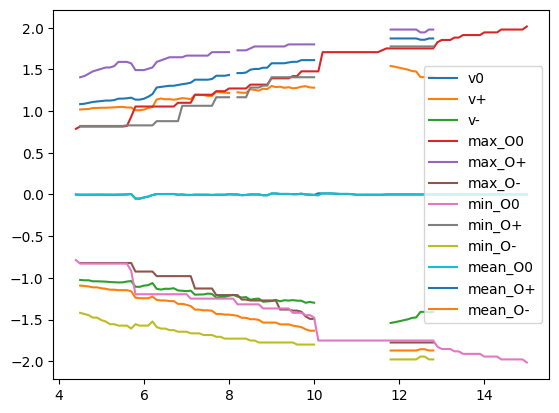

In [90]:
# plt.plot(TLO_back_info['avg_dtheta']);
# plt.plot(TLO_info['cluster_info'][B]);
TLO_info['cluster_info'][B].plot()
# plt.plot(TLO_info['cluster_info']);

In [687]:
K_ = np.linspace(0,10,10000)

4.425442544254426

(0.0, 1.006031730083001)

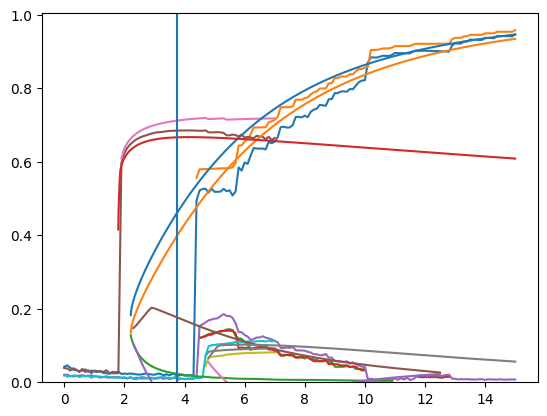

In [98]:
plt.plot(r_info[SIG])
plt.plot(r_info_back[SIG])
# (TLO_info['cluster_info'][A]/N).plot()
Ks = np.arange(0.0,15,0.1)
R_STD = get_rstd(F_R0u(Ks),rs_u,Ks,m)
K_ = np.linspace(0,15,10000)
plt.plot(K_,F_R0u(K_))
plt.plot(K_,F_RMu(K_))
plt.plot(K_,F_RMd(K_))

plt.plot(K_,F0_RMu(K_))


plt.axvline(K_[np.where(F_RMd(K_)-(0.5/N**0.5)<0)[0][0]])
# plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:red')
# plt.fill_between(Ks,F_RMu(Ks)-R_STD,F_RMu(Ks)+R_STD,alpha=0.3,color='tab:red')
Ks = np.arange(0.0,15+0.1/2,0.1)
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)
# plt.plot(Ks,rs_d2)
# plt.plot(Ks,rs_d3)
plt.plot(Ks,rs_d0)
plt.plot(Ks,rs_u0)
# plt.plot(Ks,rs_u2)
# plt.plot(Ks,R_STD)
plt.ylim(0)
# plt.plot(Ks,R_STD2)

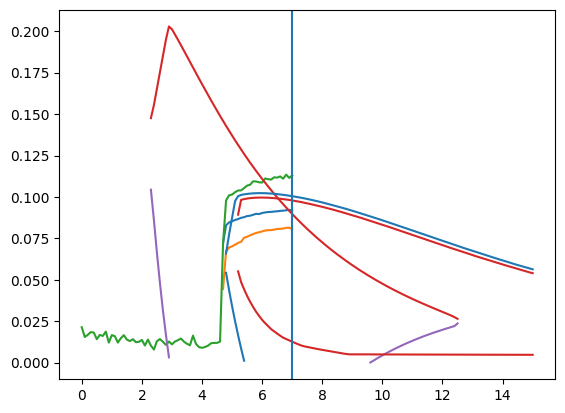

In [138]:
plt.plot(r_info_back[SIG[2:]])
# plt.plot(r_info[SIG[2:]])

plt.plot(Ks,rs_u)
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u0,color='tab:blue')
plt.plot(Ks,rs_d0,color='tab:blue')

plt.plot(Ks,rs_u02,color='tab:red')
plt.plot(Ks,rs_d02,color='tab:red')
plt.axvline(K_end)
# plt.plot(Ks_back,rs_d0d)
# plt.plot(Ks_back,rs_u0d)

In [21]:
c_size = cluster_info['c_size']

In [22]:
c_size.keys()

dict_keys(['0', '-', '+'])

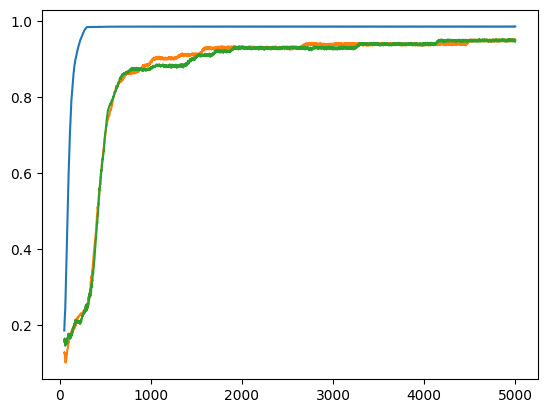

In [420]:
c_name = r_clu_info['clu_name']
t_mean = r_clu_info['t_mean']
for c  in c_name:
    plt.plot(t_mean,r_clu_info['r_clu_mean'][c]/c_size[c]*N)
# plt.plot(r_clu_info,)

In [369]:
cluster_info.keys()

dict_keys(['c_name', 'c_size', 'c_speed', 'c_color'])

In [ ]:
plt.plot()

In [123]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta[-4000:], axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)

CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-10:], height=1e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS,CMP

(array([621, 126, 122]), array([-0.00355225,  1.07591765, -1.08471736]))

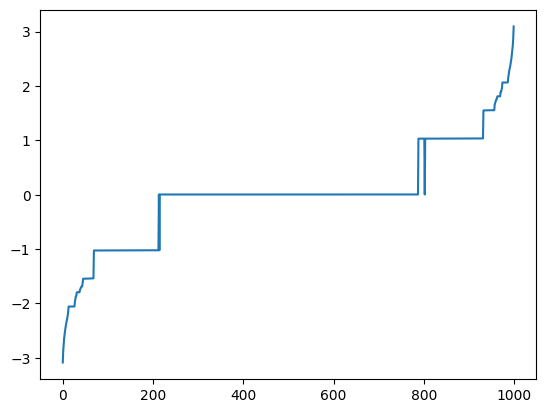

In [340]:
plt.plot(avg_dtheta[-1])

In [334]:
CLU = np.concatenate([*cluster])
not_CLU = np.setdiff1d(np.arange(N), CLU)
not_main = np.setdiff1d(np.arange(N), cluster[0])
rs_clu = {}
rs_clu_mean = {}
rs_clu_std = {}
psi_clu = {}
sum_time = 1000
M = CMO[0]

names = {}
colors = {}
c_nums = []
'gold','aqua','fuchsia'

CS_s = {}
cluster_s = {}

for size,sp,clu in zip(CS,CMO,cluster):
    ro = sp-CMO[0]
    if ro==0:cname='0';names[cname]='Main cluster';colors[cname]='gold';CS_s[cname]=size;cluster_s[cname]=clu
    elif ro<0:cname='-';names[cname]=r'secondary cluster$(-)$';colors[cname]='aqua';CS_s[cname]=size;cluster_s[cname]=clu
    else:cname='+';names[cname]=r'secondary cluster$(+)$';colors[cname]='fuchsia';CS_s[cname]=size;cluster_s[cname]=clu
    temp = 1/N*np.sum(np.exp(1j*theta[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu[cname]=rc
    rs_clu_mean[cname]=rc_mean
    rs_clu_std[cname]=rc_std
    psi_clu[cname]=psic


temp_clu = 1/N*np.sum(np.exp(1j*theta[:, CLU]), axis=1)
temp_nclu = 1/N*np.sum(np.exp(1j*theta[:, not_CLU]), axis=1)

r_clu = abs(temp_clu)
r_nclu = abs(temp_nclu)
rs_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])
rs_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                    for i in range(len(t)-sum_time)])


## Cluster Check algorithm again

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
RK4_jit = IJ.RK4

In [55]:
from knockknock import desktop_sender


@desktop_sender(title="Knockknock Desktop Notifier")
def ALRAM(): pass

In [515]:
seed = 9
N = 1000
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
K = 5
dt = 0.1
t = np.arange(0, 10000+dt/2, dt)
Theta = np.zeros(2*N)
Theta[:N] = theta_random 
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t, args=(omega, N, m, K))
theta,dtheta = sol[:,:N],sol[:,N:2*N]
rs = np.abs(np.mean(np.exp(theta.T*1j),axis=0))
# theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
#                         p_theta=theta_random, p_dtheta=omega, p_omega=omega)
# sum_time = 2000
if dt <0.1:
    t = t[::10]
    theta = theta[::10]
    dtheta = dtheta[::10]
    rs = rs[::10]

In [90]:
np.mean(rs[-500:])

0.5625691076252162

Text(0.5, 1.0, '$m=6,K=5,N=1000$')

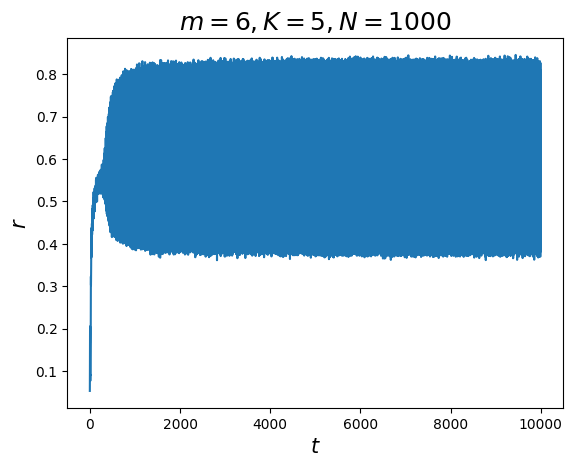

In [91]:
plt.plot(t,rs)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$r$',fontsize=15)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)


In [75]:
np.std(rs[-5000:])/np.sqrt(2)*2

0.010317958789878744

In [516]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta[-4000:], axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)

CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-100:], height=15e-3, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS/N

array([0.621, 0.126, 0.123])

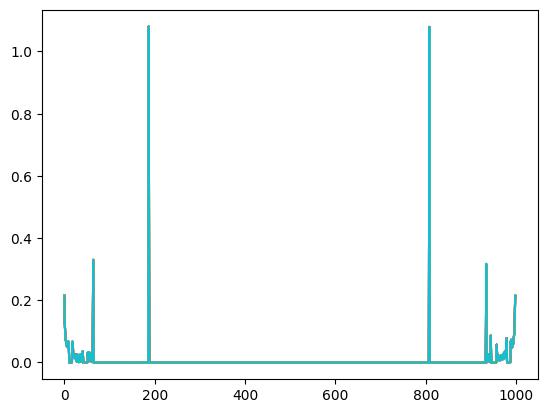

In [135]:
plt.plot(np.diff(np.sort(avg_dtheta[-10:]),axis=1).T)

In [ ]:
def cluster_os_new3(AVG,height=1e-2,c_std = 3,check=2e-4,c_size=3,N=500,omega=[]):
    num = 0
    C_size = []
    C_start = []
    C_end = []
    sort_avg = np.sort(AVG,axis=1)
    sort_argavg = np.argsort(AVG,axis=1)
    diff_avg = np.diff(np.c_[sort_avg[:,0],sort_avg],axis=1)
    min_len = 10
    for A,c_start,c_end in [peaks_(x,height,N=N) for x in diff_avg]:
        min_len = min(min_len,len(A))
        C_size.append(A)
        C_start.append(c_start)
        C_end.append(c_end)
    C_size = np.array([c_[:min_len] for c_ in C_size]).T
    C_start = np.array([c_[:min_len] for c_ in C_start]).T
    C_end = np.array([c_[:min_len] for c_ in C_end]).T
    Is_group, = np.where((np.std(C_start,axis=1)<c_std)&(A[:min_len]>c_size))
    arg = sort_argavg[-1]

    cluster = np.array([np.arange(c_i,c_j,1) for c_i,c_j in zip(C_start[Is_group,-1],C_end[Is_group,-1])])
    check_ = [np.mean(diff_avg[-1,c_[1:]])<check for c_ in cluster]
    cluster = cluster[check_]
    C_s,C_e = [],[]
    CMO = []
    for c_ in cluster:
        c_s = np.min(arg[c_])
        c_e = np.max(arg[c_])
        C_s.append(c_s)
        C_e.append(c_e)
        mean_omega = np.mean(omega[c_s:c_e])
        CMO.append(mean_omega)
    Is_group = Is_group[check_]
    omega_s = [omega[c_s] for c_s in C_s]
    omega_e = [omega[c_e-1] for c_e in C_e]
    CMP = np.array([np.mean(sort_avg[0,c_]) for c_ in cluster])

    CS = np.array([len(c_) for c_ in cluster])
    cluster = np.array([sort_argavg[-1,c_] for c_ in cluster])
    return CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e